In [ ]:
!pip install ctreelearn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import ctl
import torch
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from os import listdir
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display
import requests
import zipfile
import io
import shutil
import pandas as pd
from sklearn.feature_selection import SequentialFeatureSelector
import time
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import math
import random
from sklearn import model_selection
import abc

# **Seleção do conjunto de imagens**

In [ ]:
dados = {
    "Selecione" : "Selecione uma opção abaixo",
    "Exp_1_Remoção_de_arruela": "1X7CwiABQpduMM9YeJGXG-YRffrVbnXQZ",
    "Exp_1_Remoção_de_parafusos": "1bbTlor0n30VCjE0Wdug6xFq49UpLwfmN",
    "Exp_1_Remoção_de_porca": "1BHz5dSdxM-gP7vyfl0vatXEIlySSFDRQ",
    "Exp_2_Remoção_de_parafusos": "1jIDEA_fLZ4oxl_dMLcORdIW73e897eGT",
    "Exp_2_Remoção_de_bucha": "1mL2yXY8yWNpP8QpM2RRjBTNyKmcPc4tn",
    "Exp_3_Remoção_de_arruela": "1m0JoTTIjAyk4yjW46rmVxkPwASNv65GN",
    "Exp_3_Remoção_de_bucha": "1mvGvl0H3plYzbRr9qF6DsF08MQpvC6CV",
    "Exp_3_Remoção_de_parafusos": "1PZxE1iH8b6SsZHLMgJzAufNwa1yOUAX0"
}
id_selecionado = None
def on_value_change(change):
    global id_selecionado
    selected_key = change['new']
    id_selecionado = dados[selected_key]
    print(f"ID selecionado: {id_selecionado}")


dropdown = widgets.Dropdown(
    options=dados.keys(),
    description='Dados:'
)
dropdown.observe(on_value_change, names='value')
display(dropdown)

### Escolher esse: Exp_2_Remoção_de_parafusos

Dropdown(description='Dados:', options=('Selecione', 'Exp_1_Remoção_de_arruela', 'Exp_1_Remoção_de_parafusos',…

ID selecionado: 1m0JoTTIjAyk4yjW46rmVxkPwASNv65GN


In [ ]:
1 Exp_1_Remoção_de_parafusos - cabeça chata
2 Exp_2_Remoção_de_parafusos - crabeça trobemta
3 Exp_3_Remoção_de_arruela
4 Exp_3_Remoção_de_bucha
5 Exp_3_Remoção_de_parafusos
6 Exp_2_Remoção_de_bucha


In [ ]:
def obter_chave_por_valor(dicionario, valor_procurado):
    for chave, valor in dicionario.items():
        if valor == valor_procurado:
            return chave
    return "Valor não encontrado"

chave_correspondente = obter_chave_por_valor(dados, id_selecionado)
print(f"A chave correspondente ao valor '{id_selecionado}' é: '{chave_correspondente}'")


A chave correspondente ao valor '1m0JoTTIjAyk4yjW46rmVxkPwASNv65GN' é: 'Exp_3_Remoção_de_arruela'


In [ ]:
destination_directory = f'/content/experimento_{chave_correspondente}'
download_url = f'https://drive.google.com/uc?id={id_selecionado}'

response = requests.get(download_url)
if response.status_code == 200:
    zip_file = io.BytesIO(response.content)
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(destination_directory)
    print("Arquivo baxado.")
else:
    print("Esso:", response.status_code)

Arquivo baxado.


In [ ]:
image_path = f'/content/experimento_{chave_correspondente}/01_in.jpg'
image = cv2.imread(image_path)
if image is not None:
    height, width, channels = image.shape
    print(f"Dimensão: {height} x {width} x {channels}")
# Dimensão: 1324 x 1177 x 3

Dimensão: 1324 x 1177 x 3


In [ ]:
# @title Default title text
# Nao rodar esse code
folder_path = f'/content/experimento_{chave_correspondente}'

# Listar todos os arquivos na pasta
files = os.listdir(folder_path)

# Separar os arquivos _in e _target
in_files = sorted([f for f in files if f.endswith('_in.jpg')])
target_files = sorted([f for f in files if f.endswith('_target.jpg')])

if len(in_files) != len(target_files):
    raise ValueError("O número de arquivos _in e _target não é igual!")

pairs = [(in_file, in_file.replace('_in.jpg', '_target.jpg')) for in_file in in_files]
random.shuffle(pairs)

pairs_to_keep = pairs[:25]
files_to_keep = [file for pair in pairs_to_keep for file in pair]

# Deletar os arquivos não necessários
for file in files:
    if file not in files_to_keep:
        os.remove(os.path.join(folder_path, file))
print(f"Reduzido para 25 pares de imagens na pasta {folder_path}.")


In [ ]:
# Separar as pastas IN e TARGET
origem = f'/content/experimento_{chave_correspondente}'

destino_in = f"/content/experimento_{chave_correspondente}_selecionadas_in"
destino_target = f"/content/experimento_{chave_correspondente}_selecionadas_target"

os.makedirs(destino_in, exist_ok=True)
os.makedirs(destino_target, exist_ok=True)

for arquivo in os.listdir(origem):
    if arquivo.endswith('in.jpg'):
        shutil.move(os.path.join(origem, arquivo), os.path.join(destino_in, arquivo))
    elif arquivo.endswith('target.jpg'):
        shutil.move(os.path.join(origem, arquivo), os.path.join(destino_target, arquivo))
print("Imagens organizadas com sucesso!")


Imagens organizadas com sucesso!


In [ ]:
# Criar o dataframe das imagens
#in_dir = f"/content/experimento_{chave_correspondente}_selecionadas_in"
#target_dir = f"/content/experimento_{chave_correspondente}_selecionadas_target"


in_dir = f'/content/refino_IN'
target_dir = f'/content/refino_TARGET'


resize_size = (int(width * 0.4), int(height * 0.4))
in_files = sorted([f for f in os.listdir(in_dir) if f.endswith(('.jpg', '.png'))])

in_images = []
out_images = []
ls_name_files = []

for in_file in in_files:
    target_file = in_file.replace('_in', '_target')
    if target_file in os.listdir(target_dir):
        input_image = cv2.imread(os.path.join(in_dir, in_file), cv2.IMREAD_GRAYSCALE)
        input_resized = cv2.resize(input_image, resize_size)
        input_vector = input_resized.ravel()
        target_image = cv2.imread(os.path.join(target_dir, target_file), cv2.IMREAD_GRAYSCALE)
        target_resized = cv2.resize(target_image, resize_size)
        target_vector = target_resized.ravel()
        in_images.append(input_vector)
        out_images.append(target_vector)

df = pd.DataFrame({
    'in': in_images,
    'out': out_images})
df['image'] = range(len(df))
df.head()


in  \
0  [189, 189, 189, 189, 189, 189, 189, 189, 189, ...   
1  [174, 174, 174, 174, 174, 174, 174, 174, 176, ...   
2  [176, 176, 176, 176, 176, 176, 176, 176, 177, ...   
3  [175, 175, 175, 176, 176, 177, 177, 177, 177, ...   
4  [171, 171, 171, 171, 171, 171, 171, 171, 173, ...   

                                                 out  image  
0  [183, 183, 183, 183, 183, 183, 183, 183, 185, ...      0  
1  [170, 170, 171, 171, 171, 172, 172, 172, 170, ...      1  
2  [169, 170, 171, 172, 172, 172, 172, 171, 173, ...      2  
3  [168, 169, 169, 170, 170, 169, 169, 168, 170, ...      3  
4  [168, 167, 167, 166, 166, 167, 167, 168, 170, ...      4

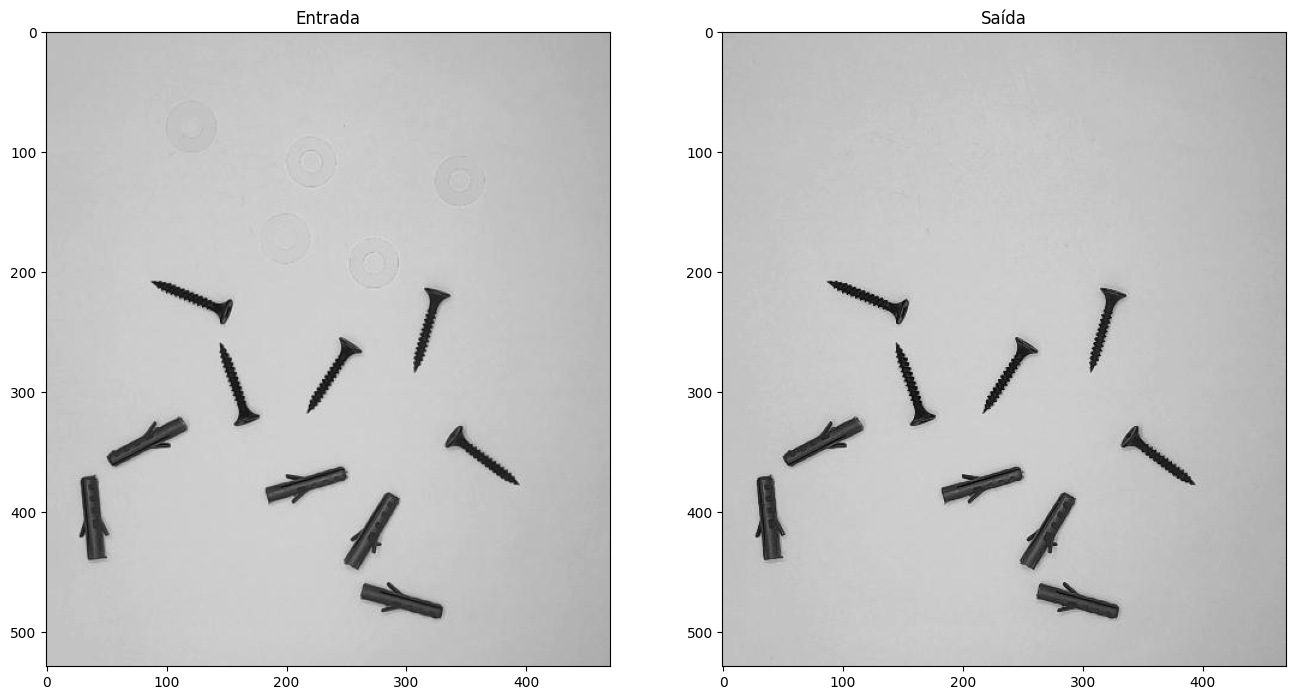

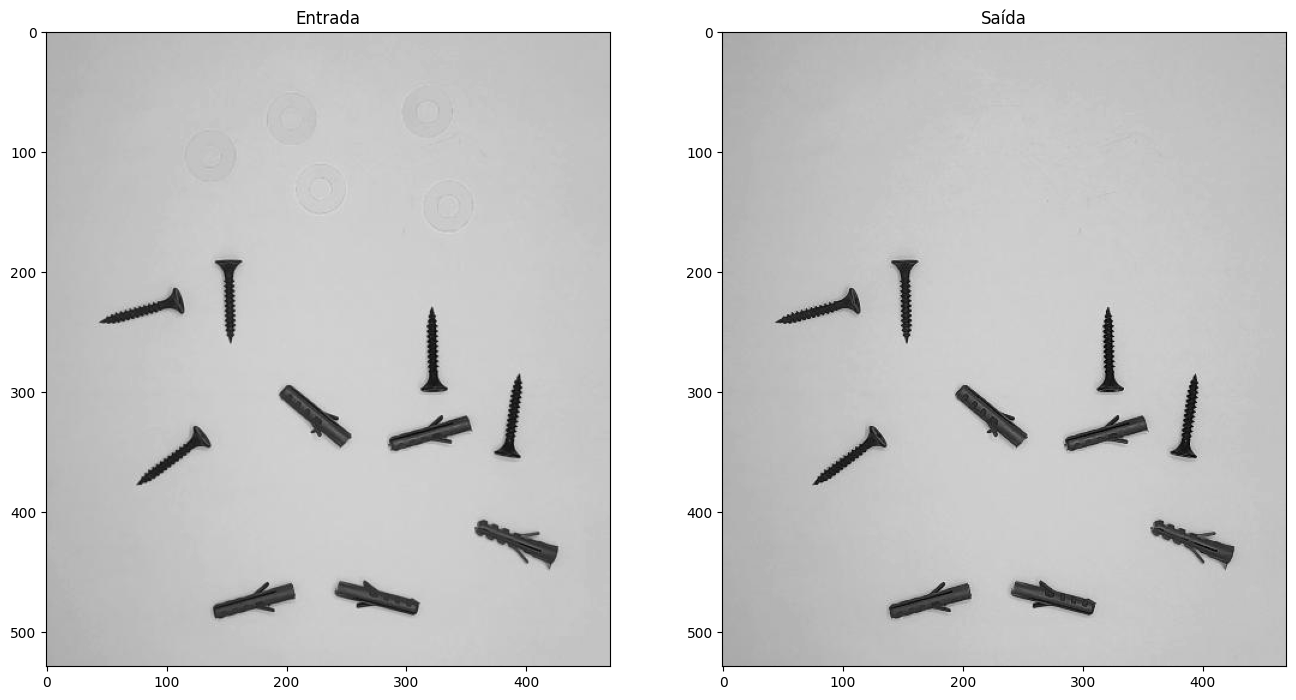

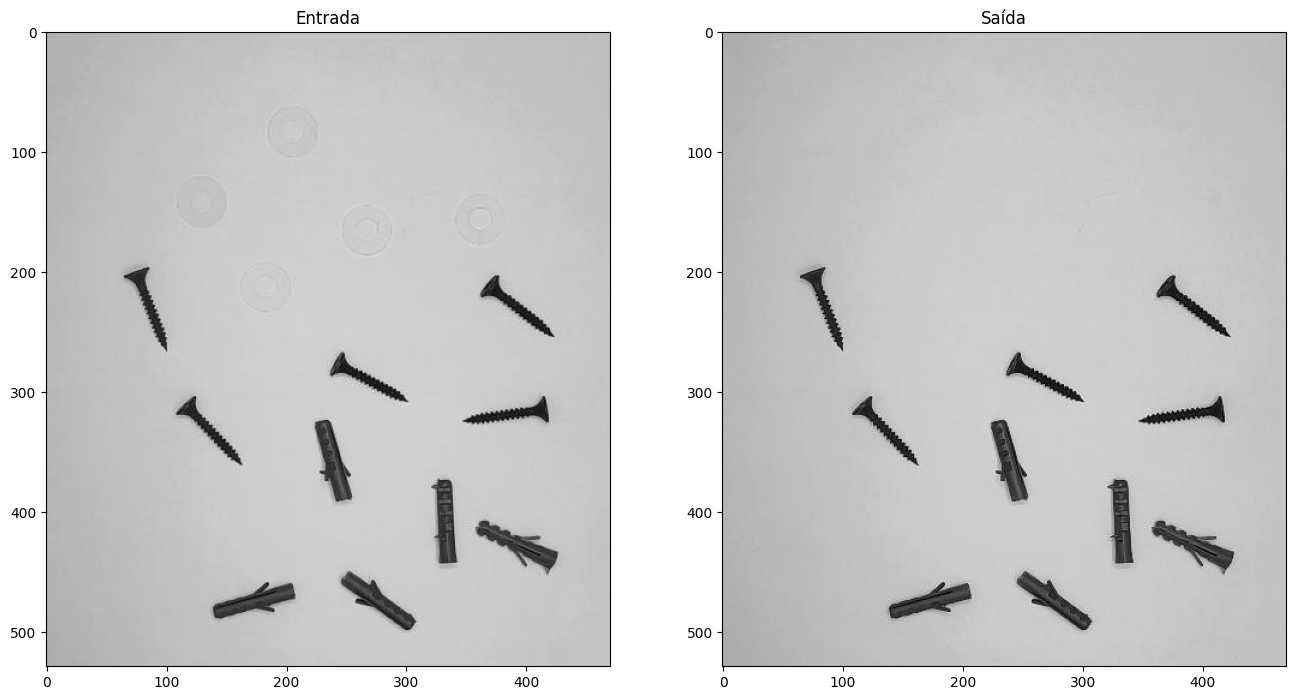

In [ ]:
output_dir = f"/content/imagens_dissertacao"
os.makedirs(output_dir, exist_ok=True)

plt.rcParams['figure.figsize'] = (16,16)
num_rows, num_cols = (resize_size[1], resize_size[0])
count = 0
for i, o in zip(df['in'], df['out']):

    input_filename = os.path.join(output_dir, f"{chave_correspondente}_IN.jpg")
    target_filename = os.path.join(output_dir, f"{chave_correspondente}_TARGET.jpg")

    plt.imsave(input_filename, i.reshape(num_rows, num_cols), cmap="gray")
    plt.imsave(target_filename, o.reshape(num_rows, num_cols), cmap="gray")

    plt.subplot(1,2,1)
    plt.imshow(i.reshape(num_rows, num_cols), cmap='gray', vmax=255, vmin=0)
    plt.title('Entrada')

    plt.subplot(1,2,2)
    plt.imshow(o.reshape(num_rows, num_cols), cmap='gray', vmax=255, vmin=0)
    plt.title('Saída')
    plt.show()
    if count == 2:
        break
    count += 1


# **Classe Dataset**

In [ ]:
class FilteringImagesDataset(torch.utils.data.Dataset, abc.ABC):

  '''
   O construtor simula uma sobrecarga:
     (1) construir a partir de um path, obj = GeneralImagesDataset(dirName="path...", num_rows, num_cols, isMaxtree, isLoaded=False)
     (2) construir a partir de um subconjunto de dados (indenficados pelos indices): obj = GeneralImagesDataset(objGeneralImagesDataset, index_data)
  '''
  def __init__(self, *args, **kwargs):
    super(torch.utils.data.Dataset, self).__init__()

    '''
    - O atributo data[] armazena pares de (entrada, saída) de todo o conjunto de dados
    - O atributo index_data[] armazena os índices dos pares (entrada, saída) que serão considerados no dataset
    '''
    self.__data = []
    self.__index_data = None
    self.__data_trees = []
    self.isLoaded = False
    self.__treeType = True
    self.num_rows = None
    self.num_cols = None
    self.scaler = None
    '''
    O atributo privado ``self.__features`` armazena um dicionario das features que serão utilizadas pelo modelo.
    Estrutura: nome da feature (key do dic) -> index da feature no vetor de atributos (value do dic).
    O valor desse atributo deve ser acesso por meio do método get_features() e set_features
    '''
    self.__features = None

    if(len(args) == 4 or len(args) == 5):
      dirName = args[0]
      files = os.listdir(dirName)
      #print(files)
      # Ordena os arquivos numericamente com base no número antes de "_in.jpg"
      files.sort(key=lambda x: int(x.split('_')[0]))

      self.num_rows = args[1]
      self.num_cols = args[2]
      self.__treeType = int(args[3])
      if(len(args) == 5):
        self.isLoaded = args[4]

      for f in files: #os.listdir(dirName):
        input = cv2.imread(dirName + "/" + f, cv2.IMREAD_GRAYSCALE)
        input = cv2.resize(input, (self.num_cols, self.num_rows), interpolation = cv2.INTER_AREA)
        img_vector = input.ravel()
        if(self.isLoaded):
            tree = self.get_tree(img_vector)
            features, attrs = ctl.Attribute.computerBasicAttributes(tree)
            self.__data_trees.append( (tree,attrs ) )
            if(self.__features is None):
              self.__features = features
        else:
          if(self.__features is None):
            tree = self.get_tree(img_vector)
            self.__features, _ = ctl.Attribute.computerBasicAttributes(tree)
        x, y = self.getSample(img_vector)
        self.__data.append( (x, y) )
      self.__index_data = list(range(len(self.__data)))

    elif(len(args) == 2): #Essa construção é sobre um dataset existente
      dataset = args[0]
      idx_data = args[1]
      self.__features = dataset.get_features()
      self.__data = [ dataset[i] for i in idx_data ]
      self.__index_data = list(range(len(self.__data)))
      self.num_rows = dataset.num_rows
      self.num_cols = dataset.num_cols
      self.__treeType = dataset.__treeType
      if(self.isLoaded):
        self.__data_trees = [ dataset.__data_trees[i] for i in idx_data ]

  def __getitem__(self, index):
    return self.__data[ self.__index_data[index] ]

  def get_tree(self, img_vector): #//0-mintree, 1-maxtree, 2-tree of shapes
    if(self.__treeType == 0):
      return ctl.ComponentTree(img_vector, self.num_rows, self.num_cols, False)
    elif(self.__treeType == 1):
      return ctl.ComponentTree(img_vector, self.num_rows, self.num_cols, True)
    else:
      return ctl.ComponentTree(img_vector, self.num_rows, self.num_cols)

  def getSample(self, img_vector):
    output= self.filter(img_vector, self.num_rows, self.num_cols)
    return torch.from_numpy(img_vector).float(), torch.from_numpy(output).float()

  def __len__(self):
    return len(self.__index_data)

  def get_features(self):
    return self.__features

  def set_features(self, features):
    self.__features = features

  def get_index_data(self):
    return self.__index_data

  def set_index_data(self, index_data):
    self.__index_data = index_data

  def get_dataXy(self):
    X = []
    y = []
    for i in self.__index_data:
      X.append(self.__data[i][0])
      y.append(self.__data[i][1])
    return X, y

  def __getitem__(self, index):
    return self.__data[ self.__index_data[index] ]

  @abc.abstractmethod
  def filter(self, img_vector):
    pass

  def get_tree_with_attributes(self, index):
    return self.__data_trees[index]

  def get_tree_type(self):
    return self.__treeType

  def get_scaler(self):
    return self.scaler

  def set_scaler(self, scaler):
    self.scaler = scaler

  def get_num_rows(self):
    return self.num_rows

  def get_num_cols(self):
    return self.num_cols

  def get_num_pixels(self):
    return self.num_rows * self.num_cols

  def train_test_split(self, test_size=0.25, normalization=True, random_state=42):
      if(type(test_size) == float):
        test_size = math.ceil(test_size * len(self))
      train_size = len(self) - test_size
      train_idx, test_idx = model_selection.train_test_split(list(range(len(self))), test_size=test_size, random_state=random_state)

      # Usar self.__class__ para chamar o construtor de uma subclasse concreta
      train_dataset = self.__class__(self, train_idx)
      test_dataset = self.__class__(self, test_idx)

      if(normalization):
        self.scaler = StandardScaler()
        # Padronização Z-score
        x0, y0 = train_dataset[0]
        tree = self.get_tree(x0)
        _, attributes = ctl.Attribute.computerBasicAttributes(tree)

        for i in range(1, len(train_dataset)):
            x, y = train_dataset[i]
            tree = self.get_tree(x)
            _, attrs = ctl.Attribute.computerBasicAttributes(tree)
            attributes = np.concatenate((attributes, attrs))
        self.scaler.fit(attributes)
        train_dataset.set_scaler(self.scaler)
        test_dataset.set_scaler(self.scaler)

      return train_dataset, test_dataset

# **Prepara o conjunto de imagens**

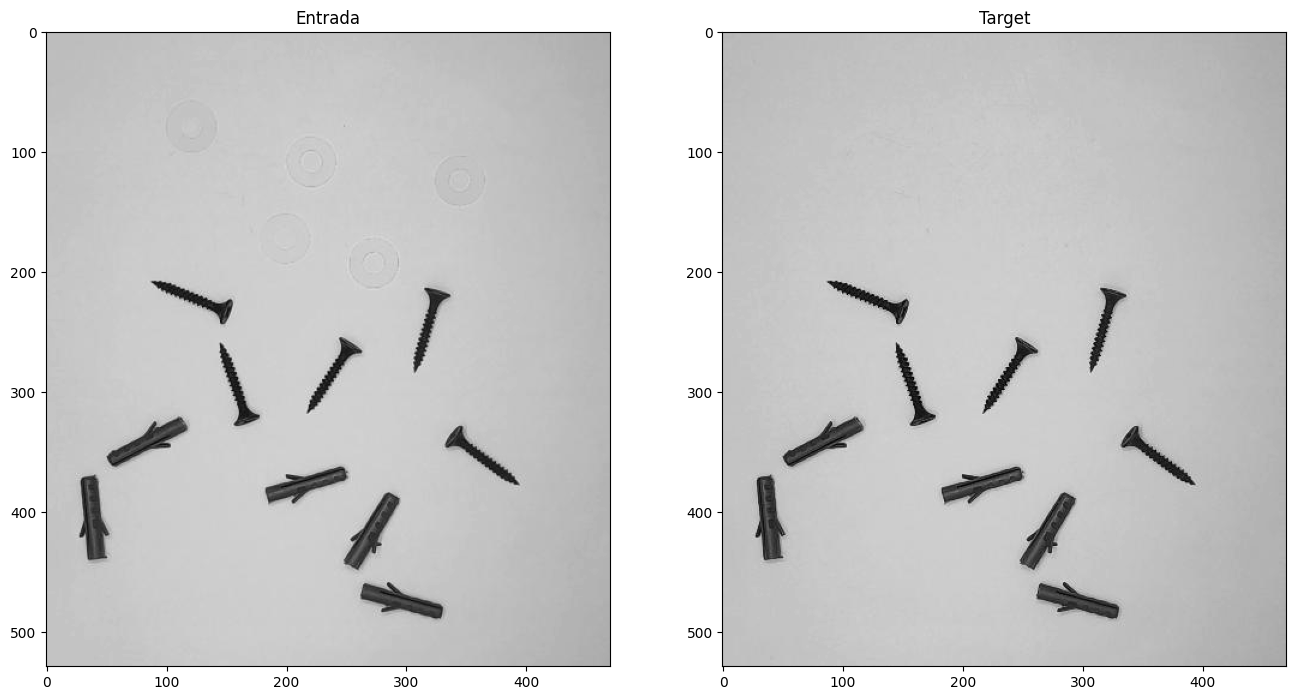

Tamanho do dataset: 47
Tamanho do trainset: 44
Tamanho do testset: 3
Quantidade de atributos: 29
Atributos: {'AREA': 0, 'VOLUME': 1, 'LEVEL': 2, 'MEAN_LEVEL': 3, 'VARIANCE_LEVEL': 4, 'STANDARD_DEVIATION': 5, 'BOX_WIDTH': 6, 'BOX_HEIGHT': 7, 'RECTANGULARITY': 8, 'RATIO_WH': 9, 'CENTRAL_MOMENT_20': 10, 'CENTRAL_MOMENT_02': 11, 'CENTRAL_MOMENT_11': 12, 'CENTRAL_MOMENT_30': 13, 'CENTRAL_MOMENT_03': 14, 'CENTRAL_MOMENT_21': 15, 'CENTRAL_MOMENT_12': 16, 'ORIENTATION': 17, 'LENGTH_MAJOR_AXIS': 18, 'LENGTH_MINOR_AXIS': 19, 'ECCENTRICITY': 20, 'COMPACTNESS': 21, 'HU_MOMENT_1_INERTIA': 22, 'HU_MOMENT_2': 23, 'HU_MOMENT_3': 24, 'HU_MOMENT_4': 25, 'HU_MOMENT_5': 26, 'HU_MOMENT_6': 27, 'HU_MOMENT_7': 28}


In [ ]:
class AreaFilteringImagesDataset(FilteringImagesDataset):
    def filter(self, img_vector, num_rows, num_cols):
        global count
        global df
        indices = df.loc[df['image'] == count].index[0]
        output = df.loc[indices, 'out']

        if count < 1:
          plt.subplot(1,2,1)
          plt.imshow(img_vector.reshape(num_rows, num_cols), cmap='gray', vmax=255, vmin=0)
          plt.title('Entrada')

          plt.subplot(1,2,2)
          plt.imshow(output.reshape(num_rows, num_cols), cmap='gray', vmax=255, vmin=0)
          plt.title('Target')
          plt.show()
        count+=1
        return output

# Todos os atributos
count = 0
num_rows, num_cols = (resize_size[1], resize_size[0])
isMaxtree = False
dataset = AreaFilteringImagesDataset(f"/content/refino_IN", num_rows, num_cols, isMaxtree)

print("Tamanho do dataset:", len(dataset))
trainset, testset = dataset.train_test_split(test_size=0.05, normalization=True, random_state=42)
print("Tamanho do trainset:", len(trainset))
print("Tamanho do testset:", len(testset))
print("Quantidade de atributos:", len(dataset.get_features()))
print("Atributos:", dataset.get_features())


# **Treinamento teste**

In [ ]:
# @title Default title text
errors = []
model = ctl.models.DifferentialMorphologicalTree(trainset)
print("Model created")
# DataLoader para o conjunto de treinamento
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True)
# Função de perda e otimizador
loss_function = ctl.models.TreeLossFunction(model)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
# Treinamento
model.train()
n_epocas = 50
for epoch in range(n_epocas):
    for i, exemplos in enumerate(trainloader, 0):
        entradas, saida_desejadas = exemplos
        # Zerar gradientes dos parâmetros
        optimizer.zero_grad()
        # Forward pass
        saida_predicoes = model(entradas)
        # Calcular a perda
        loss = loss_function(entradas, saida_desejadas, saida_predicoes)
        # Backward pass + otimização
        loss.backward()
        optimizer.step()
        errors.append(loss.item())
        if i % 100 == 0:  # Imprimir a cada 10 iterações
          print("Época:", epoch, "Iteração:", i, "Loss:", loss.item())

In [ ]:
errors = []
def percentualPixelsDiferentes(y_true, y_pred):
    rows, cols = y_true.shape
    sum_diff = 0
    for i in range(rows):
        dif = np.sum(y_true[i, :] != y_pred[i, :])
        sum_diff += (dif / cols)
    return (sum_diff / rows) * 100

from sklearn.metrics import mean_squared_error, mean_absolute_error
from skimage.metrics import structural_similarity as ssim

def psnr(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    max_pixel = 255.0
    return 10 * np.log10((max_pixel ** 2) / mse)


def ssim_metric(y_true, y_pred):
    return ssim(y_true, y_pred, data_range=255.0, multichannel=False)

output_dir = "saved_models"
os.makedirs(output_dir, exist_ok=True)
# Listas de hiperparâmetros
ls_batch_size = [1] # 2,,4,8,16,32,64,len(trainset)
ls_learning_rate = [0.1] #0.01, 0.001, 0.0001

training_times = {}
metrics_results = {}
for batch_size in ls_batch_size:
    for learning_rate in ls_learning_rate:
        print(f"Batch size: {batch_size}, Learning rate: {learning_rate}")
        # Criação do modelo
        print("Criando o modelo")
        model = ctl.models.DifferentialMorphologicalTree(trainset)
        print("Model created")
        # DataLoader para o conjunto de treinamento
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
        #
        loss_function = ctl.models.TreeLossFunction(model)
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        model.train()
        n_epocas = 50
        for epoch in range(n_epocas):
            for i, exemplos in enumerate(trainloader, 0):
                entradas, saida_desejadas = exemplos
                optimizer.zero_grad()
                saida_predicoes = model(entradas)
                #loss = loss_function(entradas, saida_desejadas, saida_predicoes)
                loss = torch.nn.MSELoss()(saida_predicoes, saida_desejadas)

                loss.backward()
                optimizer.step()
                errors.append(loss.item())
                if i % 100 == 0:
                  print("Época:", epoch, "Iteração:", i, "Loss:", loss.item())

        print("Fim do treinamento")
        print("Inicio Avaliação e cálculo de métricas")

        # Avaliação e cálculo de métricas
        X_train, y_train = trainset.get_dataXy()
        X_test, y_test = testset.get_dataXy()
        y_train = np.array(y_train)
        y_test = np.array(y_test)

        with torch.no_grad():
            y_pred_train = model(X_train).numpy()
            y_pred_test = model(X_test).numpy()

            y_pred_train2 = model.predict(X_train)
            y_pred_test2 = model.predict(X_test)

        # Cálculo de métricas
        data_range = 255.0
        metrics_results[(batch_size, learning_rate)] = {
            "Train (score)": {
                "MSE": mean_squared_error(y_train, y_pred_train),
                "MAE": mean_absolute_error(y_train, y_pred_train),
                "PPD": percentualPixelsDiferentes(y_train, y_pred_train),
                "PSNR": psnr(y_train, y_pred_train),
                "SSIM": ssim(y_train, y_pred_train, multichannel=False, data_range=data_range),
            },
            "Train (predict)": {
                "MSE": mean_squared_error(y_train, y_pred_train2),
                "MAE": mean_absolute_error(y_train, y_pred_train2),
                "PPD": percentualPixelsDiferentes(y_train, y_pred_train2),
                "PSNR": psnr(y_train, y_pred_train2),
                "SSIM": ssim(y_train, y_pred_train2, multichannel=False, data_range=data_range),
            },
            "Test (score)": {
                "MSE": mean_squared_error(y_test, y_pred_test),
                "MAE": mean_absolute_error(y_test, y_pred_test),
                "PPD": percentualPixelsDiferentes(y_test, y_pred_test),
                "PSNR": psnr(y_test, y_pred_test),
                "SSIM": ssim(y_test, y_pred_test, multichannel=False, data_range=data_range),
            },
            "Test (predict)": {
                "MSE": mean_squared_error(y_test, y_pred_test2),
                "MAE": mean_absolute_error(y_test, y_pred_test2),
                "PPD": percentualPixelsDiferentes(y_test, y_pred_test2),
                "PSNR": psnr(y_test, y_pred_test2),
                "SSIM": ssim(y_test, y_pred_test2, multichannel=False, data_range=data_range),
            },
        }

        df_metrics = pd.DataFrame(metrics_results)
        # Salvar como arquivo Excel
        output_path = f"{chave_correspondente}_todos_os_atributos_bs{batch_size}_lr_{learning_rate}.xlsx"
        df_metrics.to_excel(output_path, index=True)

        model_path = os.path.join(output_dir, f"{chave_correspondente}_todos_os_atributos_model_weights_bs_{batch_size}_lr_{learning_rate}.pth")
        torch.save(model.state_dict(), model_path)
        print(f"Pesos salvos em: {model_path}")
        print("")

Batch size: 1, Learning rate: 0.1
Criando o modelo
Model created
Época: 0 Iteração: 0 Loss: 1469.3433837890625
Época: 1 Iteração: 0 Loss: 761.6563110351562
Época: 2 Iteração: 0 Loss: 771.41943359375
Época: 3 Iteração: 0 Loss: 760.51416015625
Época: 4 Iteração: 0 Loss: 793.1346435546875
Época: 5 Iteração: 0 Loss: 813.5498657226562
Época: 6 Iteração: 0 Loss: 803.69189453125
Época: 7 Iteração: 0 Loss: 849.9270629882812
Época: 8 Iteração: 0 Loss: 801.6373901367188
Época: 9 Iteração: 0 Loss: 790.5582885742188
Época: 10 Iteração: 0 Loss: 766.9349365234375
Época: 11 Iteração: 0 Loss: 677.55029296875
Época: 12 Iteração: 0 Loss: 831.6707153320312
Época: 13 Iteração: 0 Loss: 846.6818237304688
Época: 14 Iteração: 0 Loss: 792.2451171875
Época: 15 Iteração: 0 Loss: 743.0386352539062
Época: 16 Iteração: 0 Loss: 750.8458251953125
Época: 17 Iteração: 0 Loss: 761.7128295898438
Época: 18 Iteração: 0 Loss: 802.785888671875
Época: 19 Iteração: 0 Loss: 763.2733764648438
Época: 20 Iteração: 0 Loss: 769.7219

ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.

In [ ]:
df_metrics

1
                                                               0.1
Train (score)    {'MSE': 60.30843734741211, 'MAE': 2.9283843040...
Train (predict)  {'MSE': 60.193199157714844, 'MAE': 2.916131258...
Test (score)     {'MSE': 74.4298095703125, 'MAE': 2.83939838409...
Test (predict)   {'MSE': 74.2738037109375, 'MAE': 2.82572937011...

In [ ]:
# métricas do treinamento, treinmaneto com todas as features
df_data = []
for (bs, lr), metrics in metrics_results.items():
    for key, values in metrics.items():
        df_data.append({
            'Type': key,
            'MSE': values['MSE'],
            'MAE': values['MAE'],
            'PPD': values['PPD'],
            'PSNR': values['PSNR'],
            'SSIM': values['SSIM'],
            'BS': bs,
            'LR': lr,
            'img': chave_correspondente
        })

df_metrics_clean = pd.DataFrame(df_data)
df_metrics_clean["atributos"] = "todos"
df_metrics_clean.to_excel(f"df_metrics_clean_{chave_correspondente}.1.xlsx")
df_metrics_clean

Type        MSE       MAE        PPD       PSNR      SSIM  BS  \
0    Train (score)  10.489905  2.301227  89.215219  37.923088  0.955135   1   
1  Train (predict)  10.422108  2.285972  84.916301  37.951248  0.955333   1   
2     Test (score)   9.566009  2.134607  87.918540  38.323496  0.955699   1   
3   Test (predict)   9.506785  2.120257  83.187092  38.350467  0.956029   1   

    LR                       img atributos  
0  0.1  Exp_3_Remoção_de_arruela     todos  
1  0.1  Exp_3_Remoção_de_arruela     todos  
2  0.1  Exp_3_Remoção_de_arruela     todos  
3  0.1  Exp_3_Remoção_de_arruela     todos

In [ ]:
# Esse code é redundante, poderia ser feito no treinamento, mas deixei aqui também
#model_path = f"/content/saved_models/{chave_correspondente}_todos_os_atributos_model_weights_bs_{batch_size}_lr{learning_rate}.pth"

model_path = "/content/saved_models/Exp_1_Remoção_de_parafusos_todos_os_atributos_model_weights_bs_1_lr_0.1.pth"
print("Carregando o modelo salvo...")
model = ctl.models.DifferentialMorphologicalTree(trainset)
model.load_state_dict(torch.load(model_path, weights_only=True))
model.eval()
print("Modelo carregado.")

results_dict_todos = {}

for i in range(len(testset)):
    x, y = testset[i]
    x = x.clone().detach().float()  # Apenas clone() e detach() se já for um tensor
    y = y.clone().detach().float()  # Apenas clone() e detach() se já for um tensor

    with torch.no_grad():
        y_pred = model([x])[0]

    x_np = x.cpu().numpy().reshape(num_rows, num_cols)
    y_np = y.cpu().numpy().reshape(num_rows, num_cols)
    y_pred_np = y_pred.cpu().numpy().reshape(num_rows, num_cols)
    ssim_value = ssim(y_np, y_pred_np, data_range=y_np.max() - y_np.min())
    mse_value = torch.nn.MSELoss()(y, y_pred)
    results_dict_todos[i] = {
        'x': x_np,
        'y': y_np,
        'y_pred_todos': y_pred_np,
        'SSIM_todos': round(ssim_value, 5) * 100,
        'MSE_todos': mse_value.item(),
        'range' : i
    }
print("Fim avaliação")

Carregando o modelo salvo...
Modelo carregado.
Fim avaliação


# **Feature Selection**

In [ ]:
features_names = list(trainset.get_features().keys())
features = list(trainset.get_features().values())

X_fake = np.zeros((len(trainset), len(features)))
X_fake[:,:] = features
y_fake = trainset.get_index_data()

estimator=ctl.CTLEstimator(dataset=trainset, epochs=38, learning_rate=0.1, batch_size=1)
sfs = SequentialFeatureSelector(estimator, cv=3)
sfs.fit(X_fake, y_fake)

print('\n\n\nBest subset (corresponding names):', sfs.get_feature_names_out(features_names))

In [ ]:
# Dados do modelo já treinado = 13 horas de treinamento, 50 épocas, bs 1, lr 0.1
!gdown --id 1UFMEnspq0MS7uR75No-fWwXVpHULCkIa

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UFMEnspq0MS7uR75No-fWwXVpHULCkIa
To: /content/Feature_selection_Excel.xlsx
100% 21.9k/21.9k [00:00<00:00, 47.7MB/s]


In [ ]:
# Melhores foram:
# 'AREA': 0, 'LEVEL': 2, 'VARIANCE_LEVEL': 4, 'STANDARD_DEVIATION': 5,
# 'RECTANGULARITY': 8, 'RATIO_WH': 9, 'CENTRAL_MOMENT_30': 13,
# 'CENTRAL_MOMENT_12': 16, 'LENGTH_MAJOR_AXIS': 18, 'COMPACTNESS': 21,
# 'HU_MOMENT_1_INERTIA': 22, 'HU_MOMENT_2': 23, 'HU_MOMENT_3': 24, 'HU_MOMENT_6': 27
df = pd.read_excel("Feature_selection_Excel.xlsx")
df.head(2)

Dados
0  call score() ==> Features: {'AREA': 0} score: ...
1  call score() ==> Features: {'AREA': 0} score: ...

In [ ]:
df['score'] = df['Dados'].str.extract(r'score:\s*(\d+\.\d+)').astype(float)
df.head(2)

Dados      score
0  call score() ==> Features: {'AREA': 0} score: ...  137.50024
1  call score() ==> Features: {'AREA': 0} score: ...  140.91463

In [ ]:
# menor score no feature selection
min_score = df['score'].min()
filtered_df = df[df['score'] == min_score]
filtered_df

Dados      score
942  call score() ==> Features: {'AREA': 0, 'LEVEL'...  11.822089

In [ ]:
filtered_df.loc[942, 'Dados']

"call score() ==> Features: {'AREA': 0, 'LEVEL': 2, 'VARIANCE_LEVEL': 4, 'STANDARD_DEVIATION': 5, 'RECTANGULARITY': 8, 'RATIO_WH': 9, 'CENTRAL_MOMENT_30': 13, 'LENGTH_MAJOR_AXIS': 18, 'COMPACTNESS': 21, 'HU_MOMENT_1_INERTIA': 22, 'HU_MOMENT_2': 23, 'HU_MOMENT_3': 24, 'HU_MOMENT_6': 27, 'HU_MOMENT_7': 28} score: 11.822089"

In [ ]:
import ast
atributo_contagem = {}
for _, row in df.iterrows():
    features_str = row['Dados'].split('Features: ')[-1].split(' score:')[0]
    features_dict = ast.literal_eval(features_str)
    for feature in features_dict.keys():
        if feature in atributo_contagem:
            atributo_contagem[feature] += 1
        else:
            atributo_contagem[feature] = 1

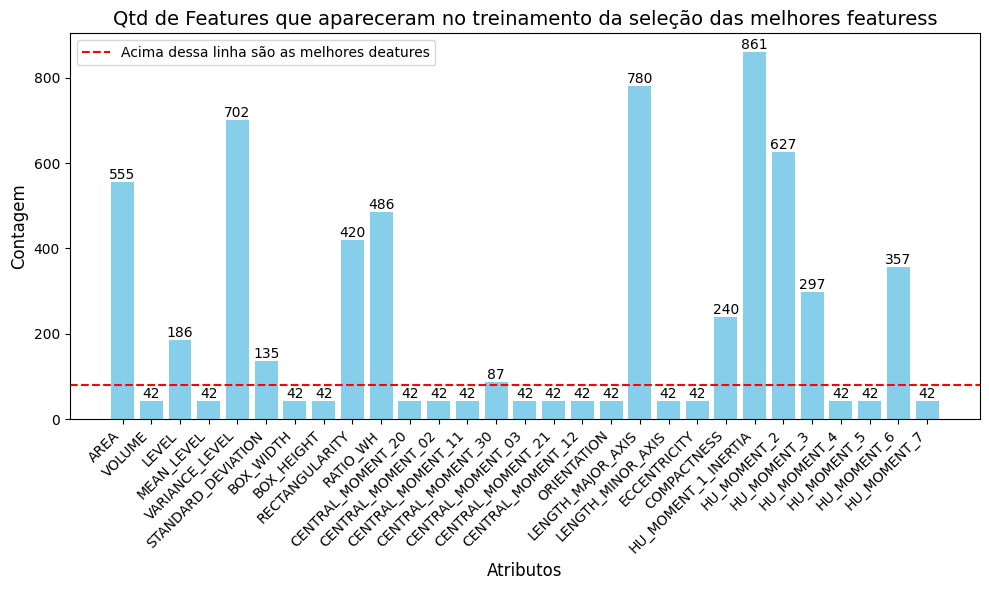

In [ ]:
features = list(atributo_contagem.keys())
contagens = list(atributo_contagem.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(features, contagens, color='skyblue')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()),
             ha='center', va='bottom', fontsize=10)
plt.axhline(y=80, color='red', linestyle='--', label='Acima dessa linha são as melhores features')

plt.title('Qtd de Features que apareceram no treinamento da seleção das melhores featuress', fontsize=14)
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

# **Treinamento com as melhores features**

In [ ]:
# Melhores features
# https://docs.google.com/spreadsheets/d/1OTymemYk-ywAWu5CkcsA6I2-Yhrub7oFhuzXDZzNlo0/edit?gid=1369884005#gid=1369884005
if chave_correspondente == "Exp_1_Remoção_de_parafusos":
  dataset.set_features({ 'AREA': 0, 'MEAN_LEVEL': 3, 'BOX_HEIGHT': 7, 'CENTRAL_MOMENT_20': 10, 'CENTRAL_MOMENT_30': 13, 'CENTRAL_MOMENT_21': 15, 'CENTRAL_MOMENT_12': 16, 'ORIENTATION': 17, 'LENGTH_MAJOR_AXIS': 18, 'ECCENTRICITY': 20, 'HU_MOMENT_2': 23, 'HU_MOMENT_4': 25, 'HU_MOMENT_5': 26, 'HU_MOMENT_7': 28 })
  print("Atributos:", dataset.get_features())
  print("Quantidade de atributos:", len(dataset.get_features()))

elif chave_correspondente == "Exp_2_Remoção_de_parafusos":
  dataset.set_features({ 'AREA': 0, 'LEVEL': 2, 'VARIANCE_LEVEL': 4, 'STANDARD_DEVIATION': 5, 'RECTANGULARITY': 8, 'RATIO_WH': 9, 'CENTRAL_MOMENT_30': 13, 'CENTRAL_MOMENT_12': 16, 'LENGTH_MAJOR_AXIS': 18, 'COMPACTNESS': 21, 'HU_MOMENT_1_INERTIA': 22, 'HU_MOMENT_2': 23, 'HU_MOMENT_3': 24, 'HU_MOMENT_6': 27 })
  print("Atributos:", dataset.get_features())
  print("Quantidade de atributos:", len(dataset.get_features()))

elif chave_correspondente == "Exp_3_Remoção_de_arruela":
  dataset.set_features({ 'VOLUME': 1, 'LEVEL': 2, 'MEAN_LEVEL': 3, 'BOX_WIDTH': 6, 'RECTANGULARITY': 8, 'RATIO_WH': 9, 'CENTRAL_MOMENT_20': 10, 'LENGTH_MAJOR_AXIS': 18, 'LENGTH_MINOR_AXIS': 19, 'COMPACTNESS': 21, 'HU_MOMENT_1_INERTIA': 22, 'HU_MOMENT_2': 23, 'HU_MOMENT_3': 24, 'HU_MOMENT_6': 27 })
  print("Atributos:", dataset.get_features())
  print("Quantidade de atributos:", len(dataset.get_features()))

elif chave_correspondente == "Exp_3_Remoção_de_bucha":
  dataset.set_features({ 'AREA': 0, 'MEAN_LEVEL': 3, 'VARIANCE_LEVEL': 4, 'BOX_WIDTH': 6, 'RATIO_WH': 9, 'CENTRAL_MOMENT_20': 10, 'CENTRAL_MOMENT_21': 15, 'CENTRAL_MOMENT_12': 16, 'LENGTH_MAJOR_AXIS': 18, 'LENGTH_MINOR_AXIS': 19, 'HU_MOMENT_1_INERTIA': 22, 'HU_MOMENT_2': 23, 'HU_MOMENT_5': 26, 'HU_MOMENT_6': 27 })
  print("Atributos:", dataset.get_features())
  print("Quantidade de atributos:", len(dataset.get_features()))

elif chave_correspondente == "Exp_3_Remoção_de_parafusos":
  dataset.set_features({ 'AREA': 0, 'VARIANCE_LEVEL': 4, 'RECTANGULARITY': 8, 'RATIO_WH': 9, 'CENTRAL_MOMENT_20': 10, 'CENTRAL_MOMENT_11': 12, 'CENTRAL_MOMENT_03': 14, 'LENGTH_MAJOR_AXIS': 18, 'HU_MOMENT_1_INERTIA': 22, 'HU_MOMENT_2': 23, 'HU_MOMENT_3': 24, 'HU_MOMENT_5': 26, 'HU_MOMENT_6': 27, 'HU_MOMENT_7': 28 })
  print("Atributos:", dataset.get_features())
  print("Quantidade de atributos:", len(dataset.get_features()))

elif chave_correspondente == "Exp_2_Remoção_de_bucha":
  dataset.set_features({ 'LEVEL': 2, 'VARIANCE_LEVEL': 4, 'STANDARD_DEVIATION': 5, 'BOX_WIDTH': 6, 'CENTRAL_MOMENT_20': 10, 'CENTRAL_MOMENT_02': 11, 'CENTRAL_MOMENT_30': 13, 'LENGTH_MAJOR_AXIS': 18, 'COMPACTNESS': 21, 'HU_MOMENT_1_INERTIA': 22, 'HU_MOMENT_2': 23, 'HU_MOMENT_3': 24, 'HU_MOMENT_4': 25, 'HU_MOMENT_6': 27 })
  print("Atributos:", dataset.get_features())
  print("Quantidade de atributos:", len(dataset.get_features()))

print(chave_correspondente)


Atributos: {'VOLUME': 1, 'LEVEL': 2, 'MEAN_LEVEL': 3, 'BOX_WIDTH': 6, 'RECTANGULARITY': 8, 'RATIO_WH': 9, 'CENTRAL_MOMENT_20': 10, 'LENGTH_MAJOR_AXIS': 18, 'LENGTH_MINOR_AXIS': 19, 'COMPACTNESS': 21, 'HU_MOMENT_1_INERTIA': 22, 'HU_MOMENT_2': 23, 'HU_MOMENT_3': 24, 'HU_MOMENT_6': 27}
Quantidade de atributos: 14
Exp_3_Remoção_de_arruela


In [ ]:
# Melhores features
print("Tamanho do dataset:", len(dataset))
#trainset, testset = dataset.train_test_split(test_size=0.25, normalization=True, random_state=42) # Testar
print("Tamanho do trainset:", len(trainset))
print("Tamanho do testset:", len(testset))
print("Quantidade de atributos:", len(dataset.get_features()))
print("Atributos:", dataset.get_features())

Tamanho do dataset: 50
Tamanho do trainset: 35
Tamanho do testset: 15
Quantidade de atributos: 14
Atributos: {'VOLUME': 1, 'LEVEL': 2, 'MEAN_LEVEL': 3, 'BOX_WIDTH': 6, 'RECTANGULARITY': 8, 'RATIO_WH': 9, 'CENTRAL_MOMENT_20': 10, 'LENGTH_MAJOR_AXIS': 18, 'LENGTH_MINOR_AXIS': 19, 'COMPACTNESS': 21, 'HU_MOMENT_1_INERTIA': 22, 'HU_MOMENT_2': 23, 'HU_MOMENT_3': 24, 'HU_MOMENT_6': 27}


In [ ]:
errors = []
# Listas de hiperparâmetros
ls_batch_size = [1] # 2,,4,8,16,32,64,len(trainset)
ls_learning_rate = [0.1] #0.01, 0.001, 0.0001

training_times = {}
metrics_results = {}
for batch_size in ls_batch_size:
    for learning_rate in ls_learning_rate:
        print(f"Batch size: {batch_size}, Learning rate: {learning_rate}")
        # Criação do modelo
        print("Criando o modelo")
        model = ctl.models.DifferentialMorphologicalTree(trainset)
        print("Model created")
        # DataLoader para o conjunto de treinamento
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
        #
        loss_function = ctl.models.TreeLossFunction(model)
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        model.train()
        n_epocas = 50
        for epoch in range(n_epocas):
            for i, exemplos in enumerate(trainloader, 0):
                entradas, saida_desejadas = exemplos
                optimizer.zero_grad()
                saida_predicoes = model(entradas)
                loss = loss_function(entradas, saida_desejadas, saida_predicoes)
                loss.backward()
                optimizer.step()
                errors.append(loss.item())
                if i % 100 == 0:
                  print("Época:", epoch, "Iteração:", i, "Loss:", loss.item())

        print("Fim do treinamento")
        print("Inicio Avaliação e cálculo de métricas")

        # Avaliação e cálculo de métricas
        X_train, y_train = trainset.get_dataXy()
        X_test, y_test = testset.get_dataXy()
        y_train = np.array(y_train)
        y_test = np.array(y_test)

        with torch.no_grad():
            y_pred_train = model(X_train).numpy()
            y_pred_test = model(X_test).numpy()

            y_pred_train2 = model.predict(X_train)
            y_pred_test2 = model.predict(X_test)

        # Cálculo de métricas
        data_range = 255.0
        metrics_results[(batch_size, learning_rate)] = {
            "Train (score)": {
                "MSE": mean_squared_error(y_train, y_pred_train),
                "MAE": mean_absolute_error(y_train, y_pred_train),
                "PPD": percentualPixelsDiferentes(y_train, y_pred_train),
                "PSNR": psnr(y_train, y_pred_train),
                "SSIM": ssim(y_train, y_pred_train, multichannel=False, data_range=data_range),
            },
            "Train (predict)": {
                "MSE": mean_squared_error(y_train, y_pred_train2),
                "MAE": mean_absolute_error(y_train, y_pred_train2),
                "PPD": percentualPixelsDiferentes(y_train, y_pred_train2),
                "PSNR": psnr(y_train, y_pred_train2),
                "SSIM": ssim(y_train, y_pred_train2, multichannel=False, data_range=data_range),
            },
            "Test (score)": {
                "MSE": mean_squared_error(y_test, y_pred_test),
                "MAE": mean_absolute_error(y_test, y_pred_test),
                "PPD": percentualPixelsDiferentes(y_test, y_pred_test),
                "PSNR": psnr(y_test, y_pred_test),
                "SSIM": ssim(y_test, y_pred_test, multichannel=False, data_range=data_range),
            },
            "Test (predict)": {
                "MSE": mean_squared_error(y_test, y_pred_test2),
                "MAE": mean_absolute_error(y_test, y_pred_test2),
                "PPD": percentualPixelsDiferentes(y_test, y_pred_test2),
                "PSNR": psnr(y_test, y_pred_test2),
                "SSIM": ssim(y_test, y_pred_test2, multichannel=False, data_range=data_range),
            },
        }

        df_metrics = pd.DataFrame(metrics_results)
        # Salvar como arquivo Excel
        output_path = f"{chave_correspondente}_BEST_atributos_bs{batch_size}_lr_{learning_rate}.xlsx"
        #df_metrics.to_excel(output_path, index=True)

        #df_metrics = pd.DataFrame(metrics_results)
        model_path = os.path.join(output_dir, f"selecao_dos_atributos_model_weights_bs_{batch_size}_lr{learning_rate}.pth")
        torch.save(model.state_dict(), model_path)
        print(f"Pesos salvos em: {model_path}")
        print("")

Batch size: 1, Learning rate: 0.1
Criando o modelo
Model created
Época: 0 Iteração: 0 Loss: 497.8969421386719
Época: 1 Iteração: 0 Loss: 8.55216121673584
Época: 2 Iteração: 0 Loss: 22.81356430053711
Época: 3 Iteração: 0 Loss: 6.604036331176758
Época: 4 Iteração: 0 Loss: 6.050397872924805
Época: 5 Iteração: 0 Loss: 6.298412322998047
Época: 6 Iteração: 0 Loss: 7.983670234680176
Época: 7 Iteração: 0 Loss: 22.005788803100586
Época: 8 Iteração: 0 Loss: 7.0769195556640625
Época: 9 Iteração: 0 Loss: 9.789944648742676
Época: 10 Iteração: 0 Loss: 6.349419116973877
Época: 11 Iteração: 0 Loss: 6.216977596282959
Época: 12 Iteração: 0 Loss: 11.601472854614258
Época: 13 Iteração: 0 Loss: 13.79999828338623
Época: 14 Iteração: 0 Loss: 17.17342185974121
Época: 15 Iteração: 0 Loss: 5.475940704345703
Época: 16 Iteração: 0 Loss: 6.460007667541504
Época: 17 Iteração: 0 Loss: 5.8949480056762695
Época: 18 Iteração: 0 Loss: 17.05437660217285
Época: 19 Iteração: 0 Loss: 20.060665130615234
Época: 20 Iteração: 0

In [ ]:
# métricas do treinamento, treinmaneto com as melhores features
df_data = []
for (bs, lr), metrics in metrics_results.items():
    for key, values in metrics.items():
        df_data.append({
            'Type': key,
            'MSE': values['MSE'],
            'MAE': values['MAE'],
            'PPD': values['PPD'],
            'PSNR': values['PSNR'],
            'SSIM': values['SSIM'],
            'BS': bs,
            'LR': lr,
            'img': chave_correspondente
        })

df_metrics_clean_fs = pd.DataFrame(df_data)
df_metrics_clean_fs["atributos"] = "selecionados"
df_metrics_clean_fs.to_excel(f"df_metrics_clean_fs{chave_correspondente}.xlsx")
df_metrics_clean_fs



Type        MSE       MAE        PPD       PSNR      SSIM  BS  \
0    Train (score)  16.146944  2.799505  93.031692  36.049900  0.910514   1   
1  Train (predict)  16.016371  2.787565  89.887026  36.085162  0.911421   1   
2     Test (score)  14.275793  2.582100  91.706452  36.584801  0.920223   1   
3   Test (predict)  14.297264  2.585725  85.828062  36.578274  0.920921   1   

    LR                         img     atributos  
0  0.1  Exp_1_Remoção_de_parafusos  selecionados  
1  0.1  Exp_1_Remoção_de_parafusos  selecionados  
2  0.1  Exp_1_Remoção_de_parafusos  selecionados  
3  0.1  Exp_1_Remoção_de_parafusos  selecionados

In [ ]:
# Esse code é redundante, poderia ser feito no treinamento, mas deixei aqui também
model_path = output_dir + "/" + f"selecao_dos_atributos_model_weights_bs_{batch_size}_lr{learning_rate}.pth"

print("Carregando o modelo salvo...")
model = ctl.models.DifferentialMorphologicalTree(trainset)
model.load_state_dict(torch.load(model_path, weights_only=True))
model.eval()
print("Modelo carregado.")

results_dict_selecionados = {}
for i in range(len(testset)):
    x, y = testset[i]
    x = x.clone().detach().float()  # Apenas clone() e detach() se já for um tensor
    y = y.clone().detach().float()  # Apenas clone() e detach() se já for um tensor

    with torch.no_grad():
        y_pred = model([x])[0]

    x_np = x.cpu().numpy().reshape(num_rows, num_cols)
    y_np = y.cpu().numpy().reshape(num_rows, num_cols)
    y_pred_np = y_pred.cpu().numpy().reshape(num_rows, num_cols)
    ssim_value = ssim(y_np, y_pred_np, data_range=y_np.max() - y_np.min())
    mse_value = torch.nn.MSELoss()(y, y_pred)
    results_dict_selecionados[i] = {

        'y_pred_selecionados': y_pred_np,
        'SSIM_selecionados': round(ssim_value, 5) * 100,
        'MSE_selecionados': mse_value.item(),
        'range' : i
    }
print("Fim avaliação")

Carregando o modelo salvo...
Modelo carregado.
Fim avaliação


# **Comparação de treinamento:**

In [ ]:
df_concat = pd.concat([df_metrics_clean, df_metrics_clean_fs])
df_concat.reset_index(drop=True, inplace=True)
df_concat.drop(columns=['BS', 'LR'], inplace=True)
df_concat.rename(columns={'atributos': 'Features'}, inplace=True)
df_concat = df_concat[['img', 'Features', 'Type', 'MSE', 'MAE', 'PPD', 'PSNR', 'SSIM']]
df_concat.to_excel(f"df_concat_{chave_correspondente}.xlsx", index=False)
df_concat

img      Features             Type        MSE  \
0  Exp_1_Remoção_de_parafusos         todos    Train (score)  16.351456   
1  Exp_1_Remoção_de_parafusos         todos  Train (predict)  16.252401   
2  Exp_1_Remoção_de_parafusos         todos     Test (score)  13.928240   
3  Exp_1_Remoção_de_parafusos         todos   Test (predict)  13.855337   
4  Exp_1_Remoção_de_parafusos  selecionados    Train (score)  16.673958   
5  Exp_1_Remoção_de_parafusos  selecionados  Train (predict)  16.541424   
6  Exp_1_Remoção_de_parafusos  selecionados     Test (score)  14.762535   
7  Exp_1_Remoção_de_parafusos  selecionados   Test (predict)  14.510511   

        MAE        PPD       PSNR      SSIM  
0  2.806389  93.013136  35.995239  0.911002  
1  2.794918  89.934124  36.021628  0.911368  
2  2.484866  88.828742  36.691841  0.918528  
3  2.474543  84.729286  36.714633  0.918909  
4  2.825079  93.158124  35.910417  0.911109  
5  2.813549  90.044468  35.945075  0.911100  
6  2.596050  91.918545  36.439194  0.920336  
7  2.562960  85.626752  36.513976  0.920850

In [ ]:
f"df_concat_{chave_correspondente}.xlsx"

'df_concat_Exp_1_Remoção_de_parafusos.xlsx'

In [ ]:
df_concat = pd.concat([df_metrics_clean, df_metrics_clean_fs])
df_concat.reset_index(drop=True, inplace=True)
df_concat.drop(columns=['BS', 'LR'], inplace=True)
df_concat.rename(columns={'atributos': 'Features'}, inplace=True)
df_concat = df_concat[['Features', 'Type', 'MSE', 'MAE', 'PPD', 'PSNR', 'SSIM']]
df_concat

Features             Type         MSE        MAE        PPD       PSNR  \
0         todos    Train (score)   15.988359   2.758316  93.373748  36.092765   
1         todos  Train (predict)   15.888558   2.745898  89.213845  36.119959   
2         todos     Test (score)  573.457336  11.175985  93.259086  20.545792   
3         todos   Test (predict)  571.697571  11.031952  90.012736  20.559140   
4  selecionados    Train (score)   16.146944   2.799505  93.031692  36.049900   
5  selecionados  Train (predict)   16.016371   2.787565  89.887026  36.085162   
6  selecionados     Test (score)   14.275793   2.582100  91.706452  36.584801   
7  selecionados   Test (predict)   14.297264   2.585725  85.828062  36.578274   

       SSIM  
0  0.916999  
1  0.917357  
2  0.592424  
3  0.601812  
4  0.910514  
5  0.911421  
6  0.920223  
7  0.920921

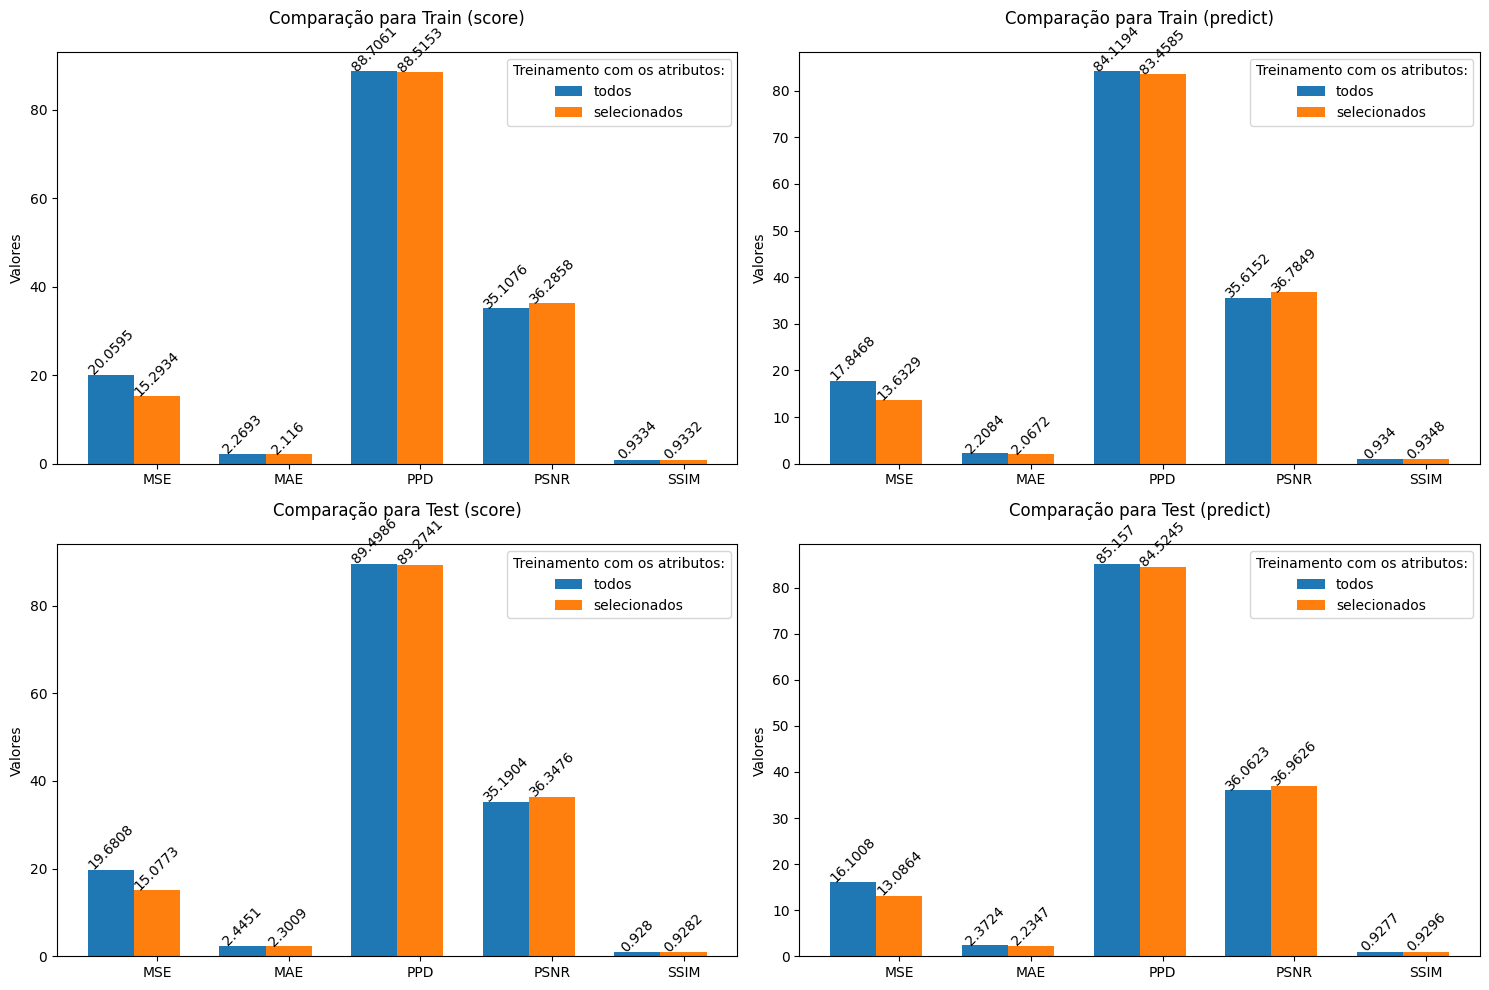

In [ ]:
df_filtered = df_concat[df_concat['Type'].isin(['Train (score)', 'Train (predict)', 'Test (score)', 'Test (predict)'])]
metrics = ['MSE', 'MAE', 'PPD', 'PSNR', 'SSIM']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
bar_width = 0.35

for i, feature_type in enumerate(['Train (score)', 'Train (predict)', 'Test (score)', 'Test (predict)']):
    ax = axes[i // 2, i % 2]
    df_feature = df_filtered[df_filtered['Type'] == feature_type]

    for j, feature in enumerate(['todos', 'selecionados']):
        df_feature_filtered = df_feature[df_feature['Features'] == feature]

        ax.bar([p + bar_width * j for p in range(len(metrics))],
               df_feature_filtered[metrics].values[0],
               bar_width, label=feature)

        for k, metric in enumerate(metrics):
            ax.text(k + bar_width * j, df_feature_filtered[metrics].values[0][k] + 0.1,
                    round(df_feature_filtered[metrics].values[0][k], 4), ha='center', rotation=45)

    ax.set_title(f'Comparação para {feature_type}', pad=20)
    ax.set_xticks([p + bar_width for p in range(len(metrics))])
    ax.set_xticklabels(metrics)
    ax.set_ylabel('Valores')
    ax.legend(title="Treinamento com os atributos:")

plt.tight_layout()
plt.show()


#**Plot predição**

In [ ]:
df_merged = pd.merge(pd.DataFrame(results_dict_todos).T, pd.DataFrame(results_dict_selecionados).T, on='range', how='inner')
df_merged.head(2)

x  \
0  [[178.0, 179.0, 177.0, 176.0, 176.0, 177.0, 17...   
1  [[179.0, 179.0, 178.0, 178.0, 176.0, 177.0, 17...   

                                                   y  \
0  [[176.0, 176.0, 176.0, 176.0, 177.0, 175.0, 17...   
1  [[177.0, 177.0, 179.0, 178.0, 174.0, 177.0, 17...   

                                        y_pred_todos SSIM_todos  MSE_todos  \
0  [[178.05515, 179.0551, 177.05518, 176.05528, 1...      94.95  13.390776   
1  [[179.03394, 179.03394, 178.03394, 178.03394, ...     95.402   19.90477   

  range                                y_pred_selecionados SSIM_selecionados  \
0     0  [[178.02852, 179.02849, 177.02855, 176.02863, ...            94.937   
1     1  [[179.01715, 179.01715, 178.01715, 178.01715, ...            95.412   

  MSE_selecionados  
0        13.393019  
1        19.721479

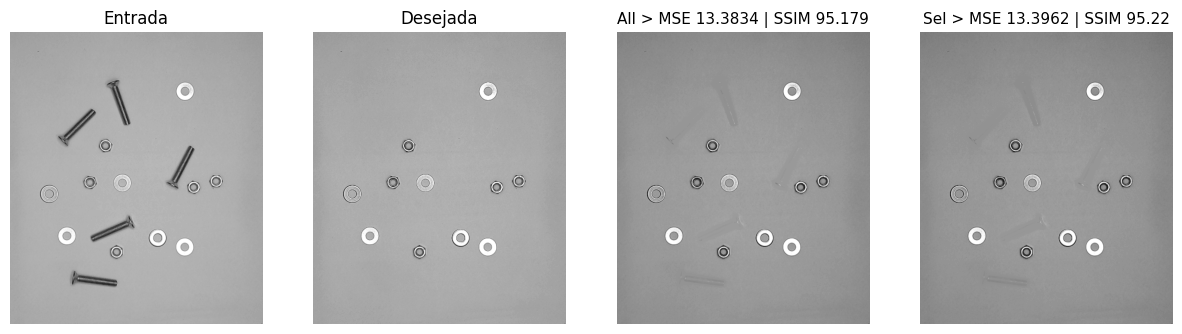

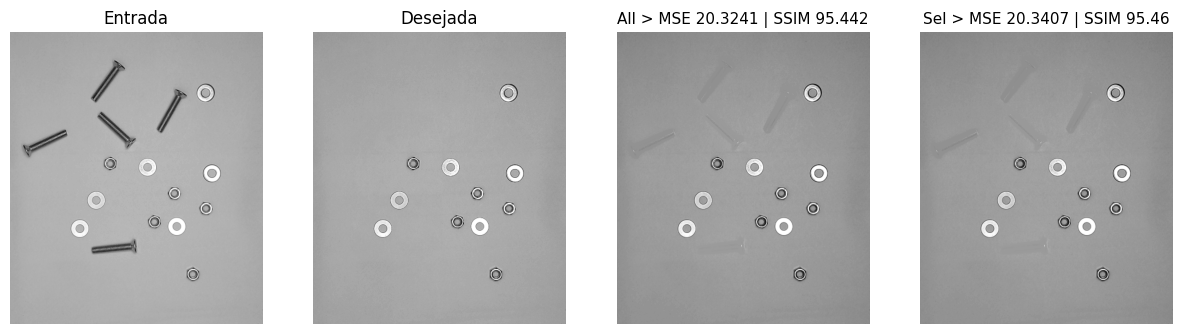

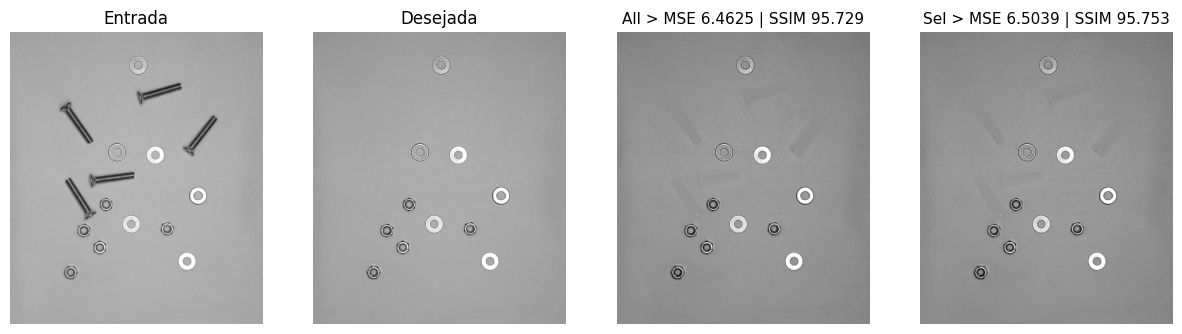

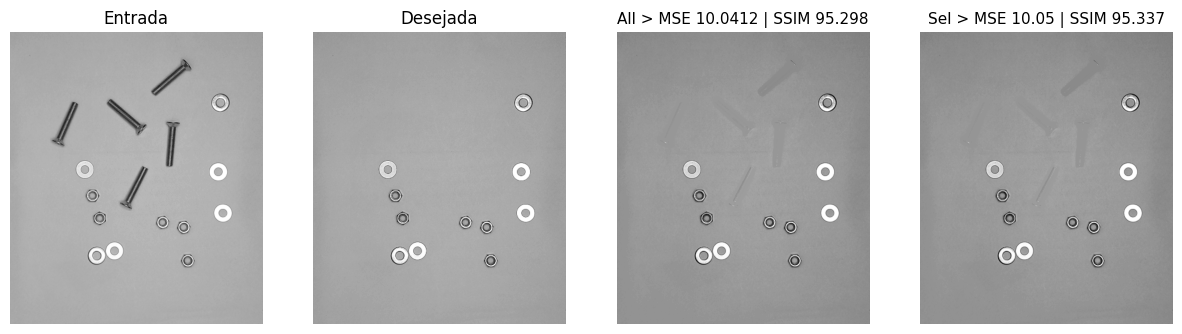

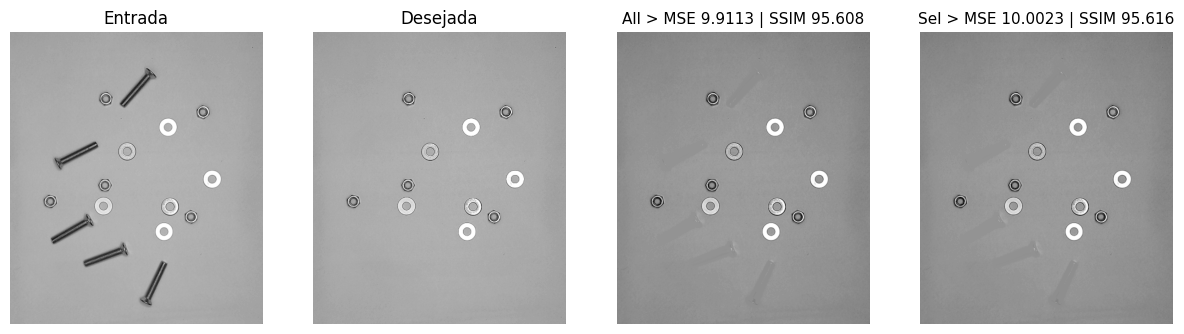

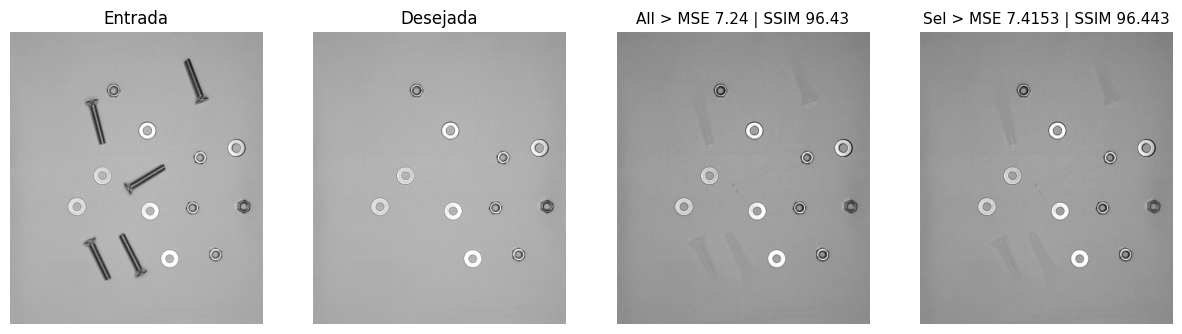

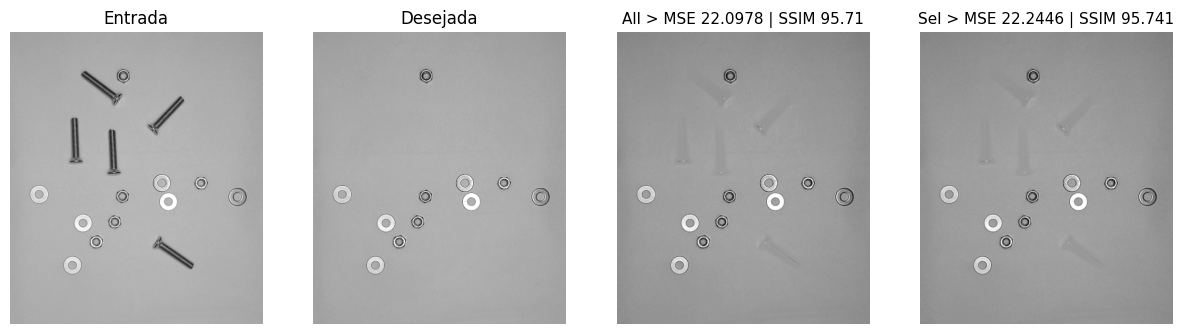

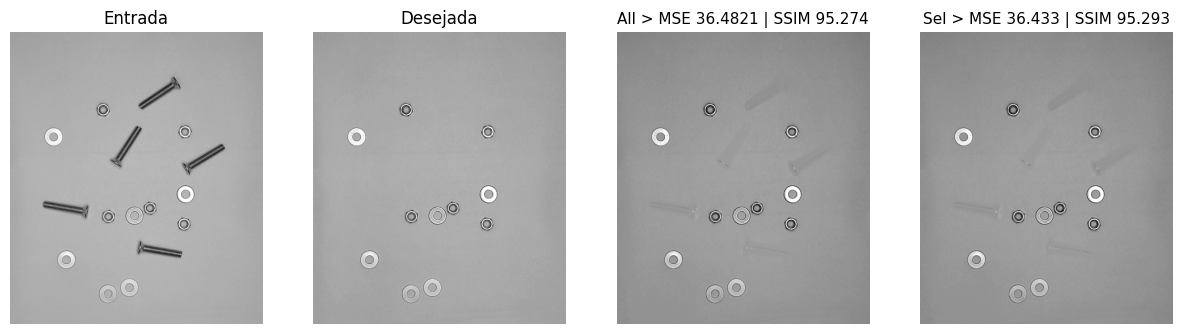

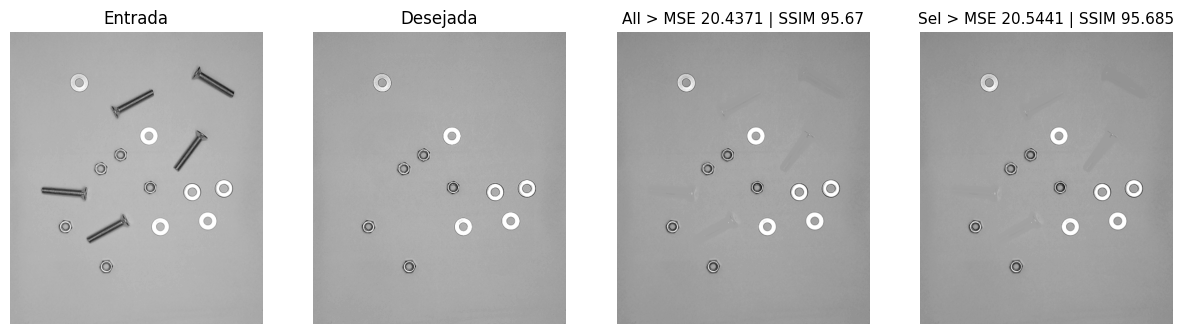

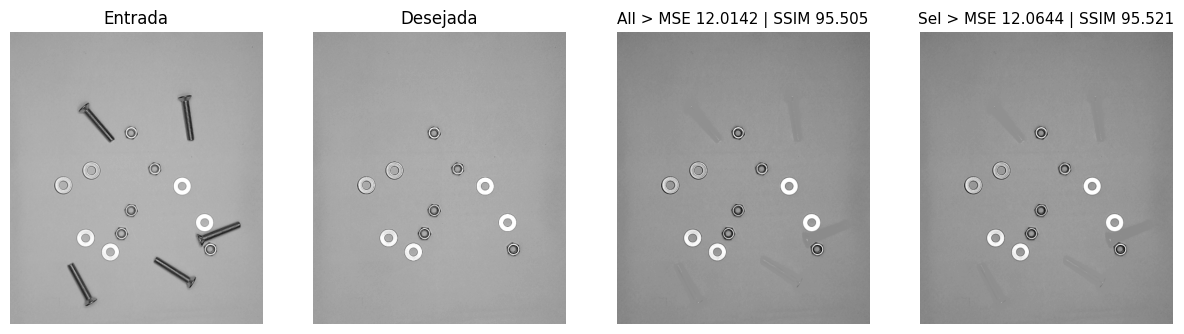

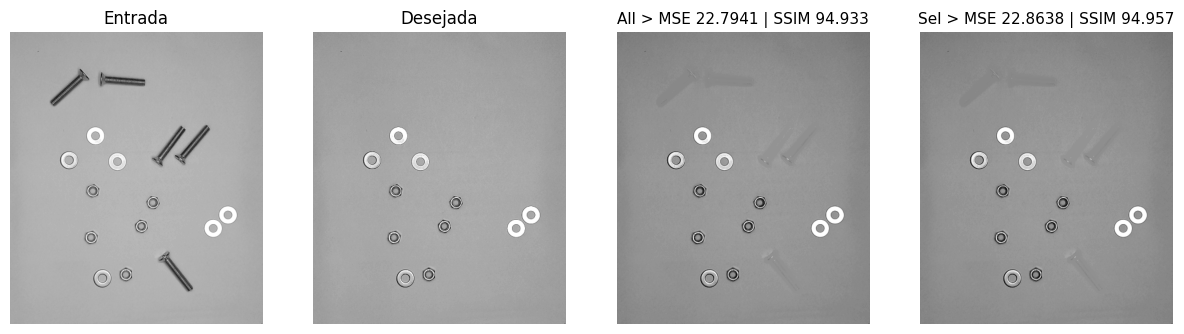

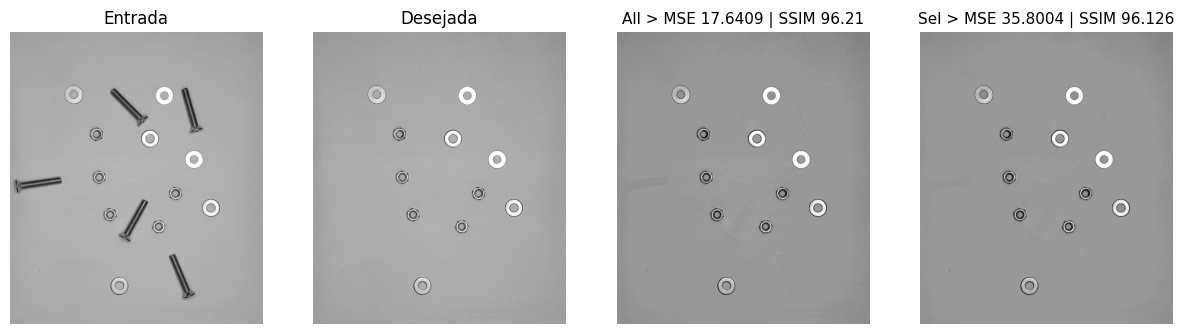

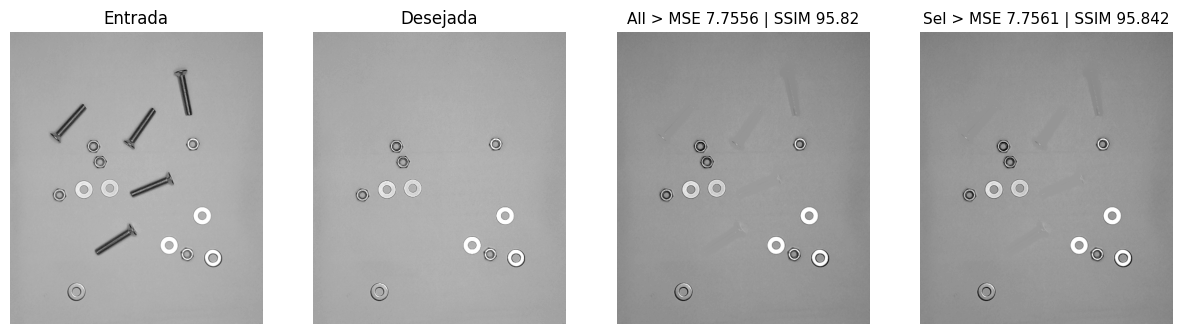

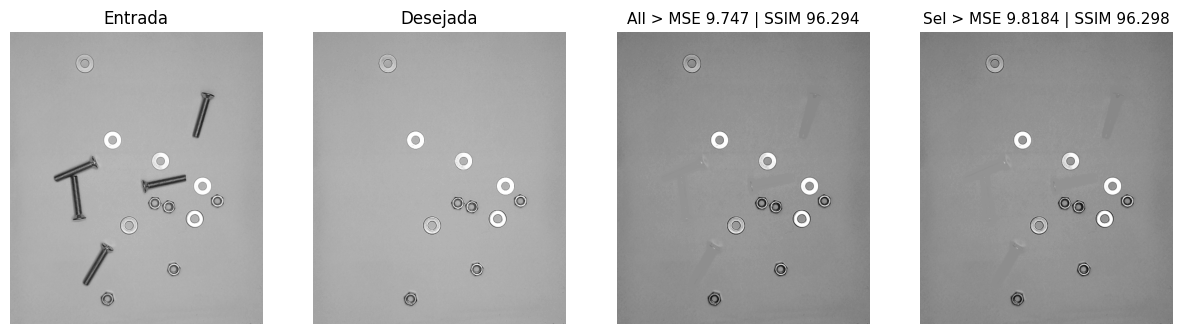

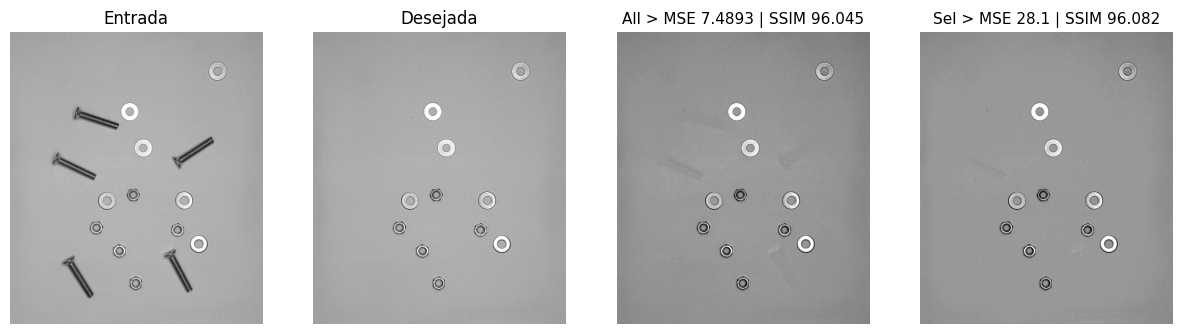

In [ ]:
for _, row in df_merged.iterrows():
    x, y, y_pred_todos, y_pred_selecionados = row['x'], row['y'], row['y_pred_todos'], row['y_pred_selecionados']
    ssim_todos, ssim_selecionados = row['SSIM_todos'], row['SSIM_selecionados']
    mse_todos, mse_selecionados = row['MSE_todos'], row['MSE_selecionados']

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 4, 1)
    plt.imshow(x, cmap="gray")  # gray_r
    plt.title("Entrada")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(y, cmap="gray")
    plt.title("Desejada")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(y_pred_todos, cmap="gray")
    plt.title(f"All > MSE {round(mse_todos,4)} | SSIM {round(ssim_todos,4)}", fontsize=11)
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(y_pred_selecionados, cmap="gray")
    plt.title(f"Sel > MSE {round(mse_selecionados,4)} | SSIM {round(ssim_selecionados,4)}", fontsize=11)
    plt.axis("off")

    plt.show()

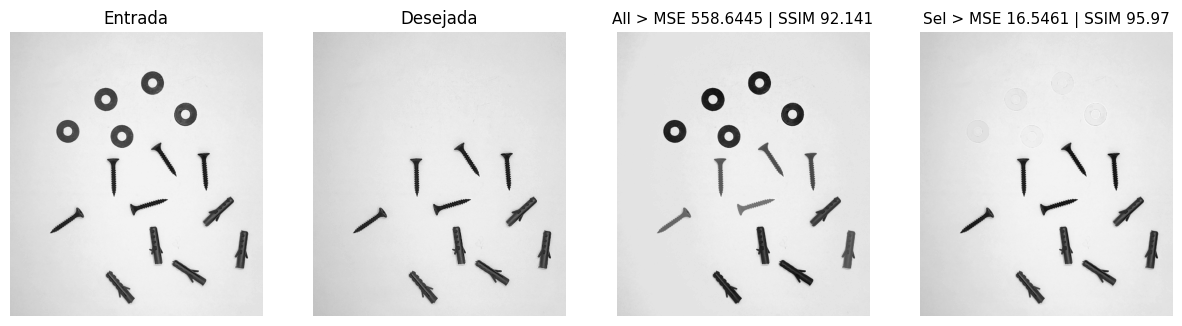

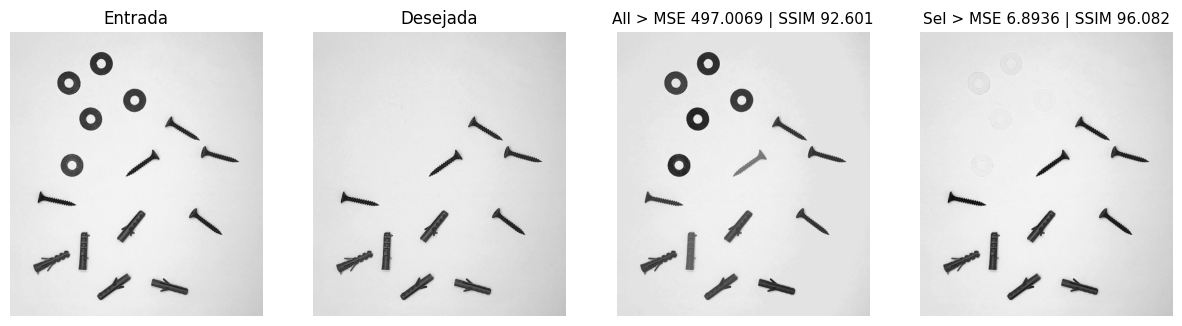

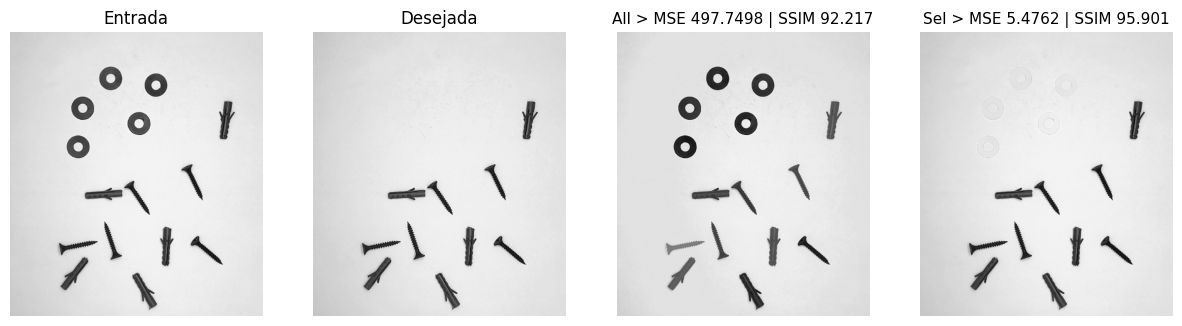

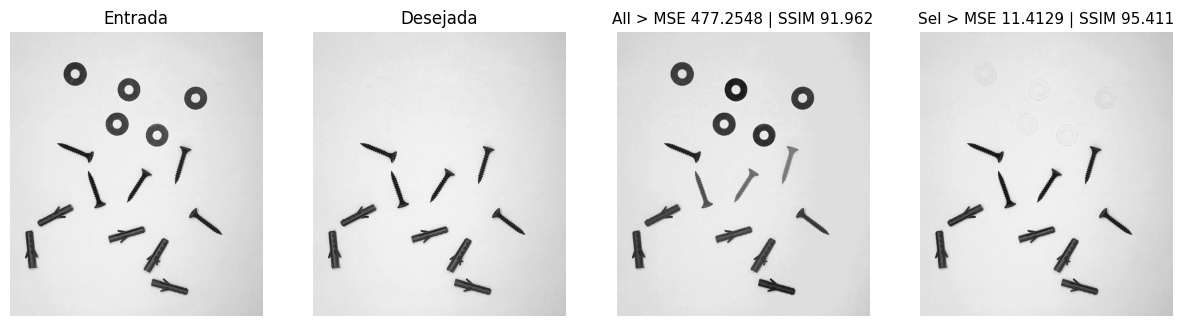

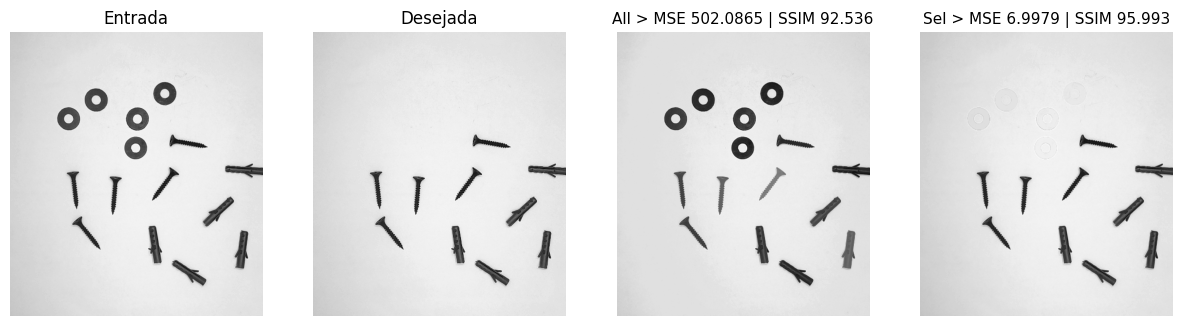

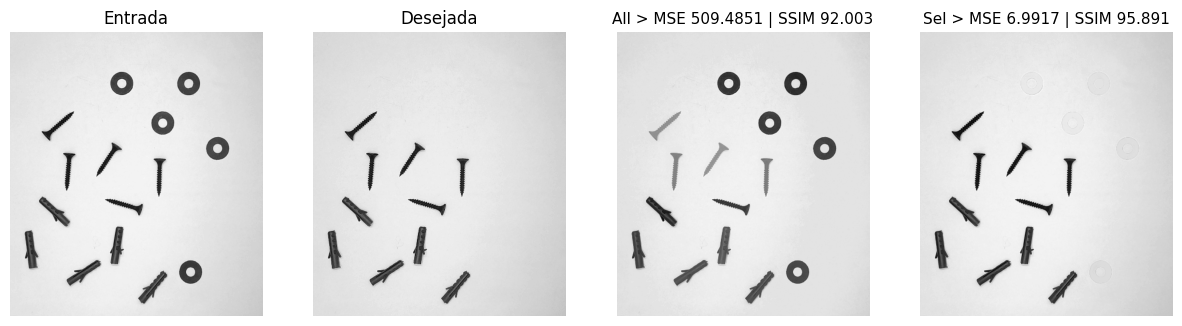

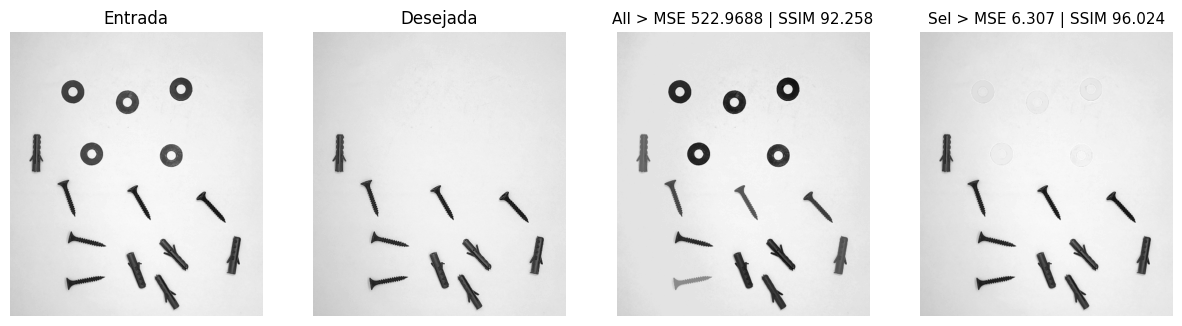

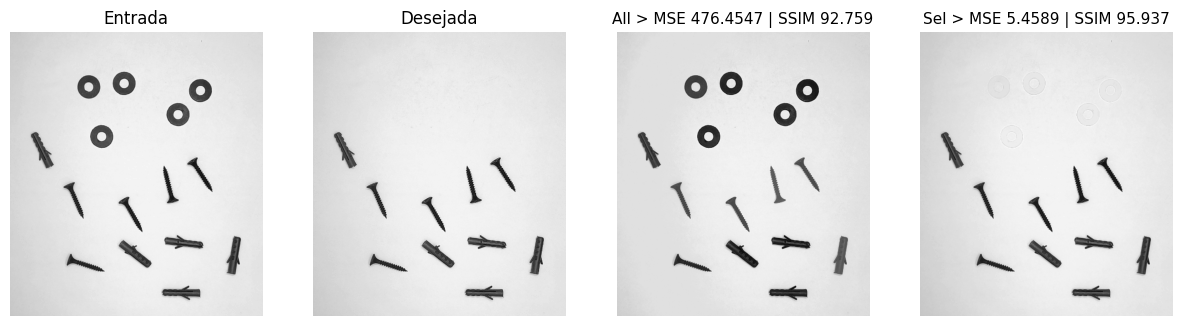

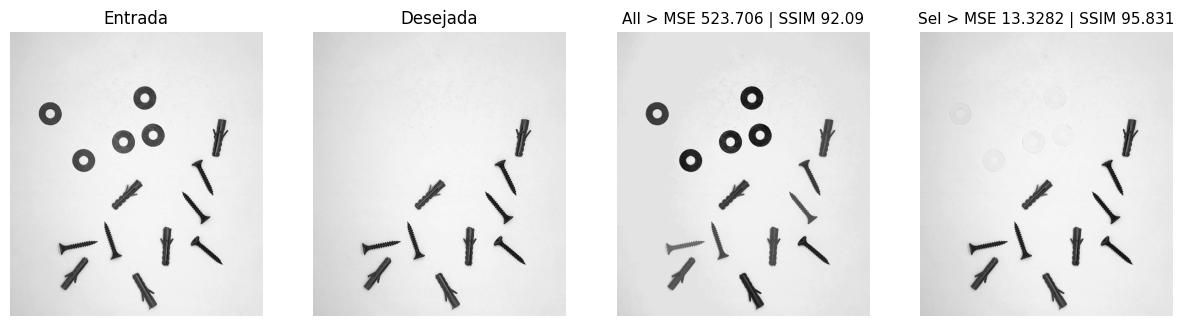

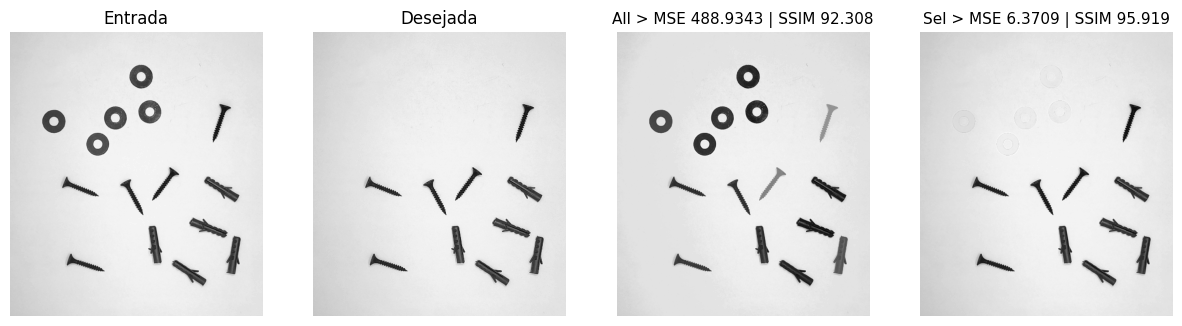

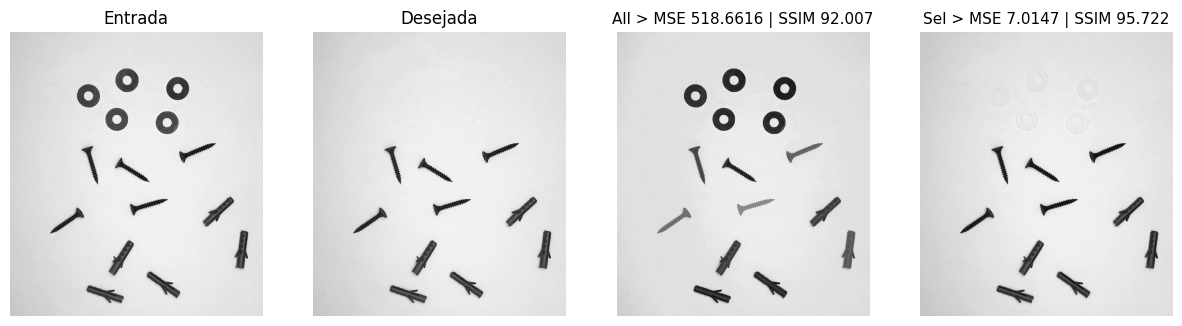

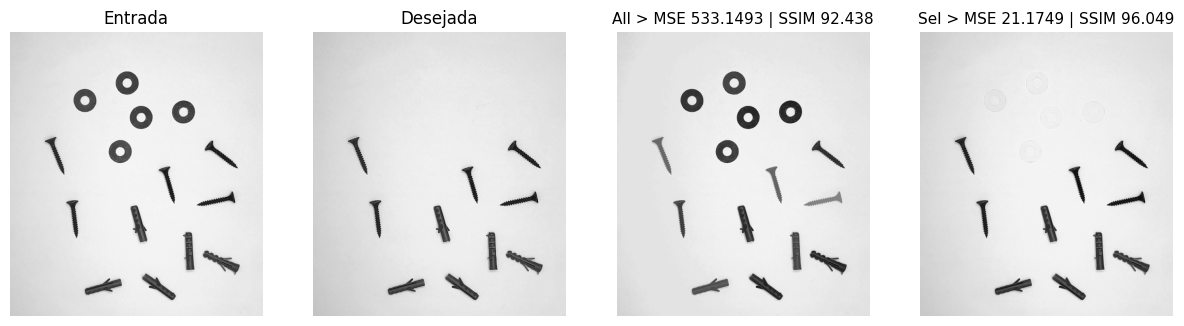

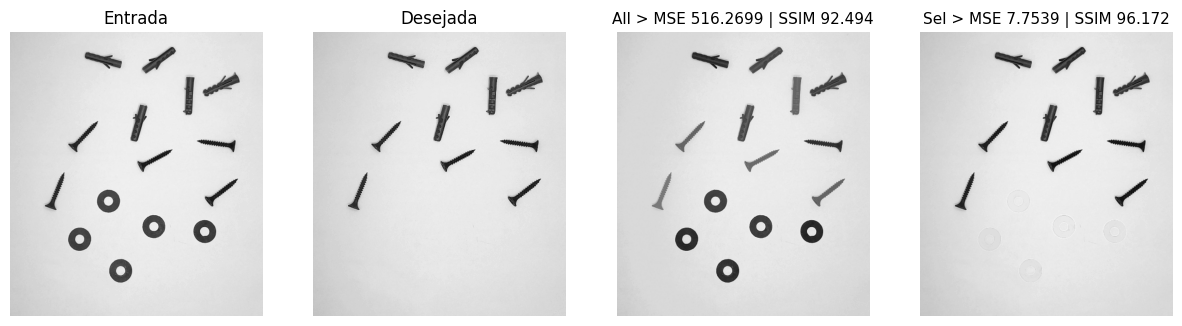

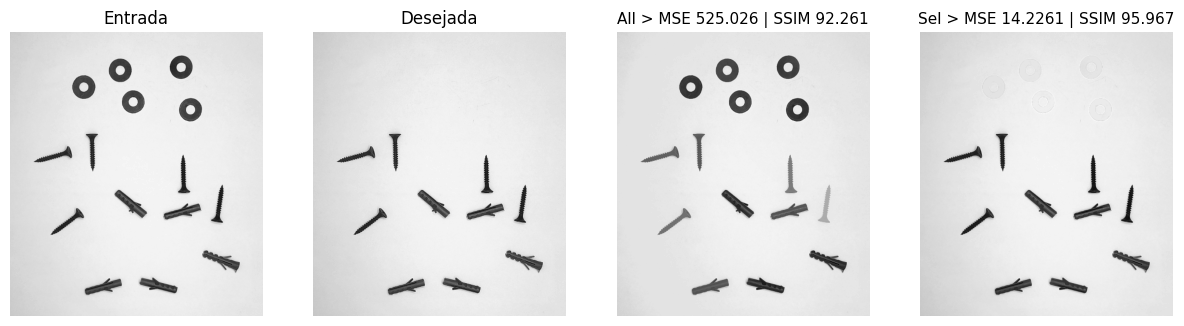

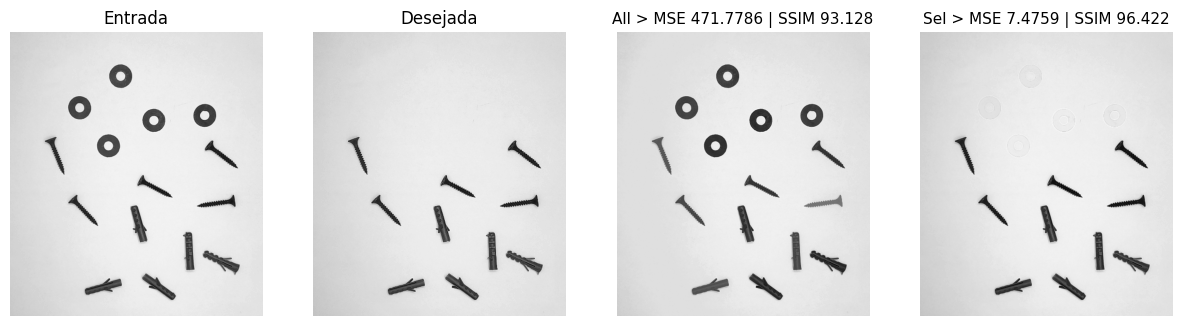

In [ ]:
# Defina o caminho da pasta onde as imagens serão salvas
output_folder = 'content/imagens_exp2'

# Certifique-se de que a pasta existe; se não, crie-a
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

count = 0

# Para cada linha no dataframe
for idx, row in df_merged.iterrows():
    x, y, y_pred_todos, y_pred_selecionados = row['x'], row['y'], row['y_pred_todos'], row['y_pred_selecionados']
    ssim_todos, ssim_selecionados = row['SSIM_todos'], row['SSIM_selecionados']
    mse_todos, mse_selecionados = row['MSE_todos'], row['MSE_selecionados']

    # Criação da figura
    plt.figure(figsize=(15, 6))

    # Subplot 1 - Entrada
    plt.subplot(1, 4, 1)
    plt.imshow(x, cmap="gray")  # Usando o cmap "gray"
    plt.title("Entrada")
    plt.axis("off")

    # Subplot 2 - Desejada
    plt.subplot(1, 4, 2)
    plt.imshow(y, cmap="gray")
    plt.title("Desejada")
    plt.axis("off")

    # Subplot 3 - Predição com todos os atributos
    plt.subplot(1, 4, 3)
    plt.imshow(y_pred_todos, cmap="gray")
    plt.title(f"All > MSE {round(mse_todos, 4)} | SSIM {round(ssim_todos, 4)}", fontsize=11)
    plt.axis("off")

    # Subplot 4 - Predição com atributos selecionados
    plt.subplot(1, 4, 4)
    plt.imshow(y_pred_selecionados, cmap="gray")
    plt.title(f"Sel > MSE {round(mse_selecionados, 4)} | SSIM {round(ssim_selecionados, 4)}", fontsize=11)
    plt.axis("off")

    if count == 0:
       # Converter tensores para arrays NumPy
      x_np = x.reshape(num_rows, num_cols)
      y_np = y.reshape(num_rows, num_cols)
      y_pred_todos = y_pred_todos.reshape(num_rows, num_cols)
      y_pred_selecionados = y_pred_selecionados.reshape(num_rows, num_cols)

      # Nome para salvar as imagens
      input_filename = os.path.join(output_folder, f"{chave_correspondente}_IN.jpg")
      target_filename = os.path.join(output_folder, f"{chave_correspondente}_TARGET.jpg")
      pred_filename_all = os.path.join(output_folder, f"{chave_correspondente}_ALL.jpg")
      pred_filename_selected = os.path.join(output_folder, f"{chave_correspondente}_SELECTED.jpg")

      # Salvar as imagens
      plt.imsave(input_filename, x_np, cmap="gray")  # Salvar a imagem desejada
      plt.imsave(target_filename, y_np, cmap="gray")  # Salvar a imagem desejada
      plt.imsave(pred_filename_all, y_pred_todos, cmap="gray")  # Salvar a imagem de predição
      plt.imsave(pred_filename_selected, y_pred_selecionados, cmap="gray")  # Salvar a imagem de predição'

    plt.show()
    plt.close()  # Fechar a figura para liberar memória


In [ ]:
chave_correspondente